In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./DataSet/data.csv", delimiter="\t")

In [3]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [4]:
df.shape

(39775, 172)

In [5]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

<h4 style="color:green">Features we take</h4>
<ul style="color:yellow">
<li>Q1A to Q42A</li>
<li>TIPI1 toTIPI10</li>
<li>Education</li>
<li>Urban</li>
<li>age</li>
<li>religion</li>
<li>race</li>
<li>married</li>
<li>family-size</li>
<li>married</li>
<li>major</li>
</ul>

In [6]:
# Features to Remove
frem = [f'Q{i}E' for i in range(1, 43)]
frem.extend([f'Q{i}I' for i in range(1, 43)])
frem.extend(['source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'orientation','voted', 'country', 'screensize', 'uniquenetworklocation'])

In [7]:
df.drop(frem, axis = 1, inplace=True)

In [8]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,VCL16,education,urban,gender,age,religion,race,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,16,12,10,1,2,NaN
1,4,1,2,3,4,4,3,4,3,2,...,1,2,3,2,16,7,70,1,4,NaN
2,3,1,4,1,4,3,1,3,2,4,...,1,2,3,2,17,4,60,1,3,NaN
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,13,4,70,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,1,3,2,2,19,10,10,1,4,Psychology


In [9]:
df.shape

(39775, 77)

<h4 style="color:orange">Handle Null Values</h4>

<Axes: >

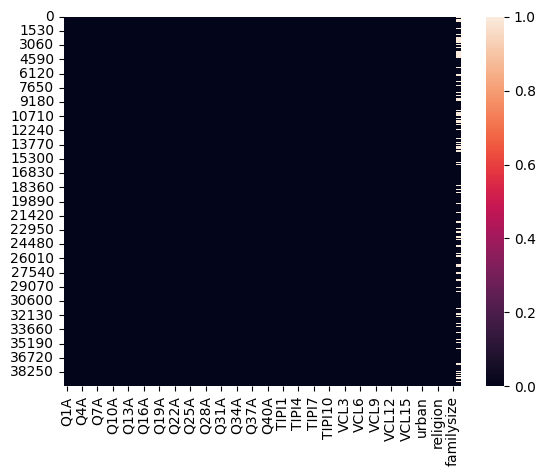

In [10]:
sns.heatmap(df.isnull())

In [11]:
# Calculating count of null Values for Each Feature
df.isnull().sum().tail()

religion          0
race              0
married           0
familysize        0
major         11425
dtype: int64

<h1 style="color:orange">Analysis of Data</h1>

In [12]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,VCL16,education,urban,gender,age,religion,race,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,16,12,10,1,2,NaN
1,4,1,2,3,4,4,3,4,3,2,...,1,2,3,2,16,7,70,1,4,NaN
2,3,1,4,1,4,3,1,3,2,4,...,1,2,3,2,17,4,60,1,3,NaN
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,13,4,70,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,1,3,2,2,19,10,10,1,4,Psychology


<div>
<p>1) Feature = Education</p>
<p>
How much education have you completed?" 

1=Less than high school, <br>
2=High school, <br>
3=University degree, <br> 
4=Graduate degree <br>
</p>
</div>

<Axes: xlabel='education', ylabel='count'>

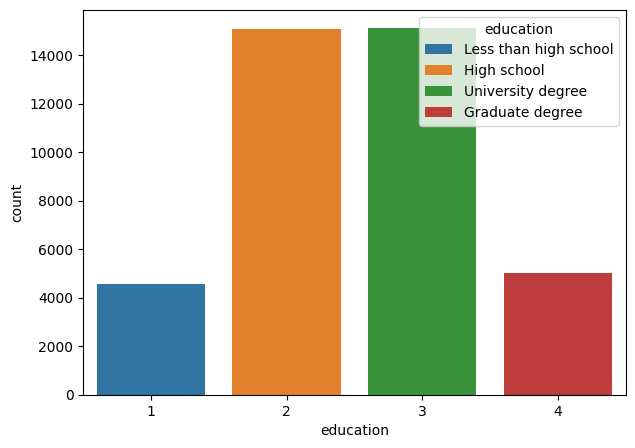

In [13]:
# Combining 0 and 1 as they represent same i.e. less than high school
df['education'] = df['education'].map({ 0: 1,  1: 1, 2: 2, 3: 3, 4: 4 })

def changeEducationTitle(title) -> str:
    if title == 0 or title == 1:
        return 'Less than high school'
    if title == 2:
        return 'High school'
    if title == 3: 
        return 'University degree'
    if title == 4: 
        return 'Graduate degree'
    return title


mapped_education = df['education'].apply(changeEducationTitle)
plt.figure(figsize=(7, 5))
sns.countplot(x=df['education'], hue=mapped_education)  

<h5>So Most of the Students who took the test are High School Students or University Students</h5>

<div>
<p>2) Feature = Major</p>
<p>
"If you attended a university, what was your major (e.g. "psychology", "English", "civil engineering")?"

</p>
</div>

In [14]:
# Simplified Major in another python module
import Major

# Filling Null values with No Degree
df['major'] = df['major'].fillna('No Degree')


df['major'] = df['major'].apply(Major.changeMajorValues)
df['major'].value_counts()

major
No Degree              12708
Engineering             3904
Business/Management     3220
I.T                     2572
Mathematics             2362
                       ...  
Mining                     1
usa                        1
Ophthmalology              1
Cabin Crew                 1
Virology                   1
Name: count, Length: 158, dtype: int64

<Axes: ylabel='major'>

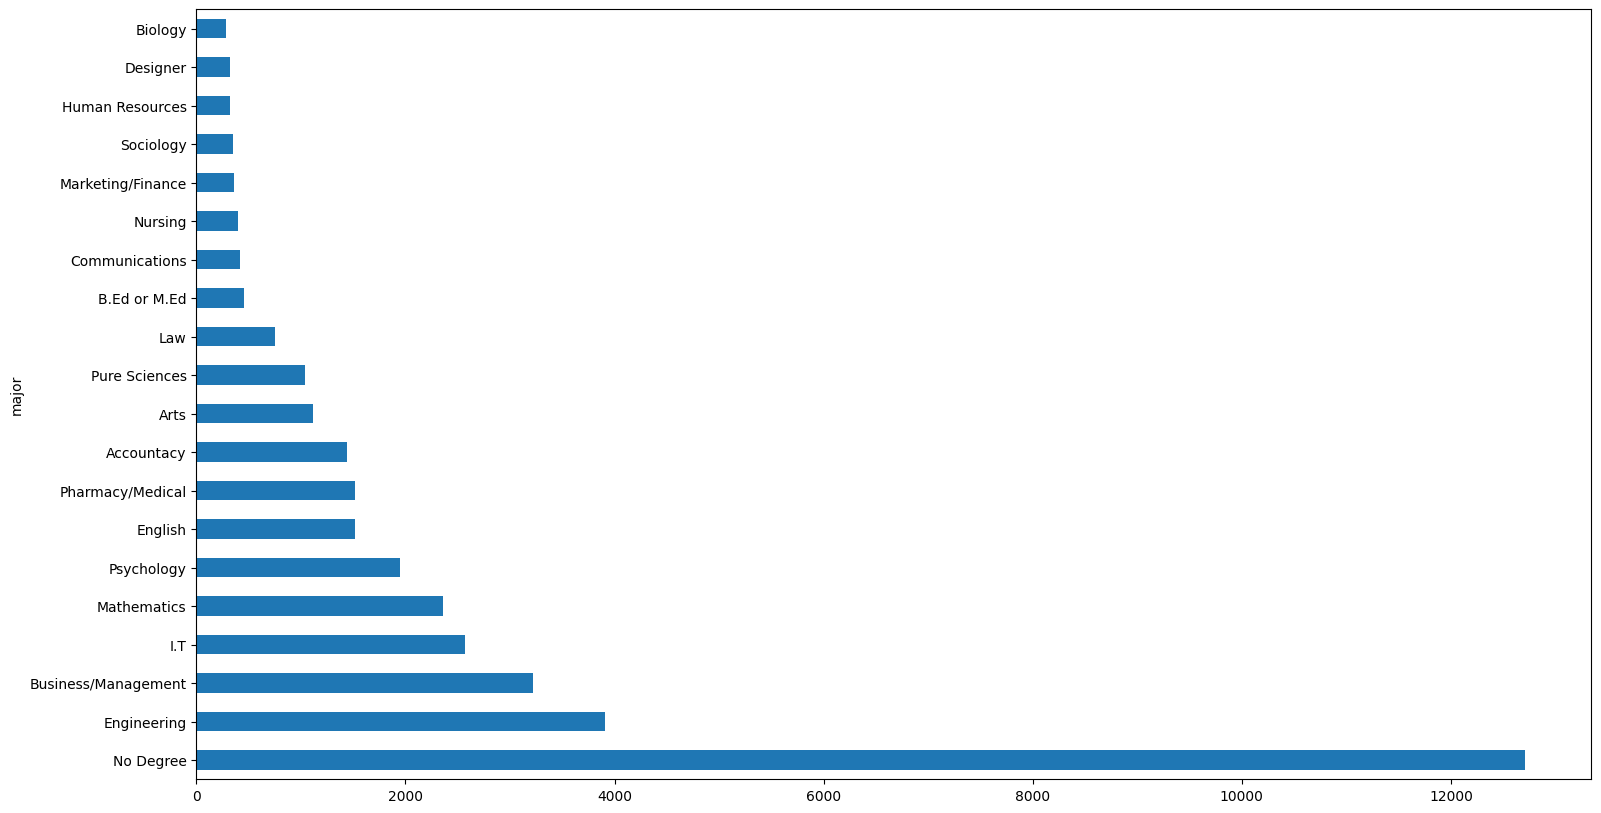

In [15]:
# Horizontal Bar Plot for Major Feature
plt.figure(figsize=(18, 10))
df['major'].value_counts()[:20].plot(kind = 'barh')

<h5>Most of The People have no degree at all</h5>

<h6>So Let's Just Remove it</h6>

In [16]:
df.drop("major", inplace = True, axis = 1)

<div>
<p>3) Feature = Urban</p>
<p>
"What type of area did you live when you were a child?", <br><br>
0 = None <br> 1 = Rural (country side),<br> 2 = Suburban,<br> 3 = Urban 
</p>
</div>

<Axes: xlabel='urban', ylabel='count'>

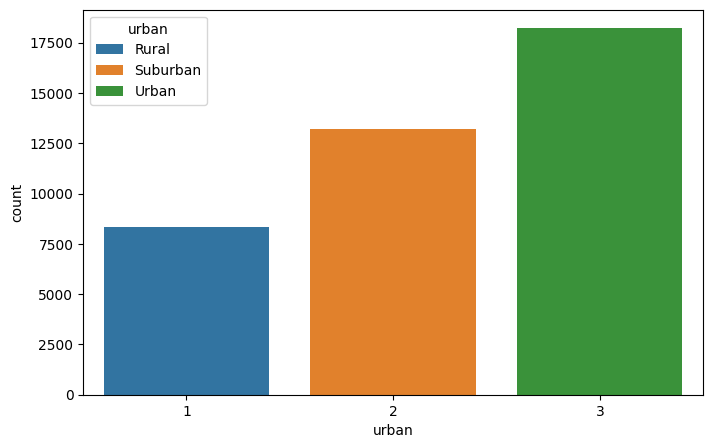

In [17]:
# Now as Urban is the most Used ones So we are taking None values as Urban
df['urban'] = df['urban'].map({0: 3, 1: 1, 2: 2, 3: 3})

def changeUrbanValues(value):
    if value == 1:
        return 'Rural'
    if value == 2:
        return 'Suburban'
    if value == 3:
        return 'Urban'
    return value 

urban = df['urban'].apply(changeUrbanValues)

plt.figure(figsize=(8, 5))
sns.countplot(x=df['urban'], hue= urban)

<h5>Majority People are from Urban areas like town or cities</h5>

<div>
<p>4) Feature = Gender</p>
<p>
"What is your gender?", <br><br> 1=Male, <br> 2=Female,<br>3=Other"
</p>
</div>

<Axes: xlabel='gender', ylabel='count'>

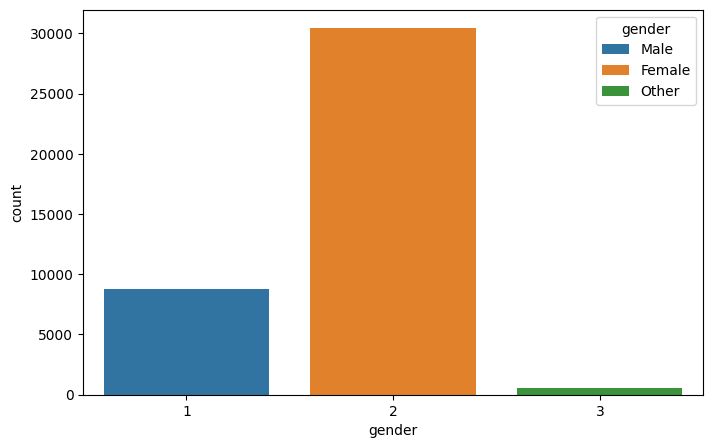

In [18]:
# Changing 0 to 2 as Females are most recorded ones 
df['gender'] = df['gender'].map({0: 2, 1: 1, 2: 2, 3: 3})

def changeGenderValue(value):
    if value == 1:
        return 'Male'
    if value == 2 or value == 0:
        return 'Female'
    return 'Other' # Let's not go there :)

gender = df['gender'].apply(changeGenderValue)

plt.figure(figsize=(8, 5))
sns.countplot(x = df['gender'], hue=gender)

<h5>Females are leading in Gender Category</h5>

<div>
<p>5) Feature = Religion</p>
<br>
<p>"What is your religion?"</p>
<ul>
<li>1=Agnostic</li>
<li>2=Atheist</li>
<li>3=Buddhist</li>
<li>4=Christian (Catholic)</li>
<li>5=Christian (Mormon)</li>
<li>6=Christian (Protestant)</li>
<li>7=Christian (Other)</li>
<li>8=Hindu</li>
<li>9=Jewish</li>
<li>10=Muslim</li>
<li>11=Sikh</li>
<li>12=Other</li>
</ul>
</div>

religion
10    22073
2      3845
1      3245
4      3097
7      2254
12     2160
6      1544
8       700
3       527
9       144
5       122
11       64
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

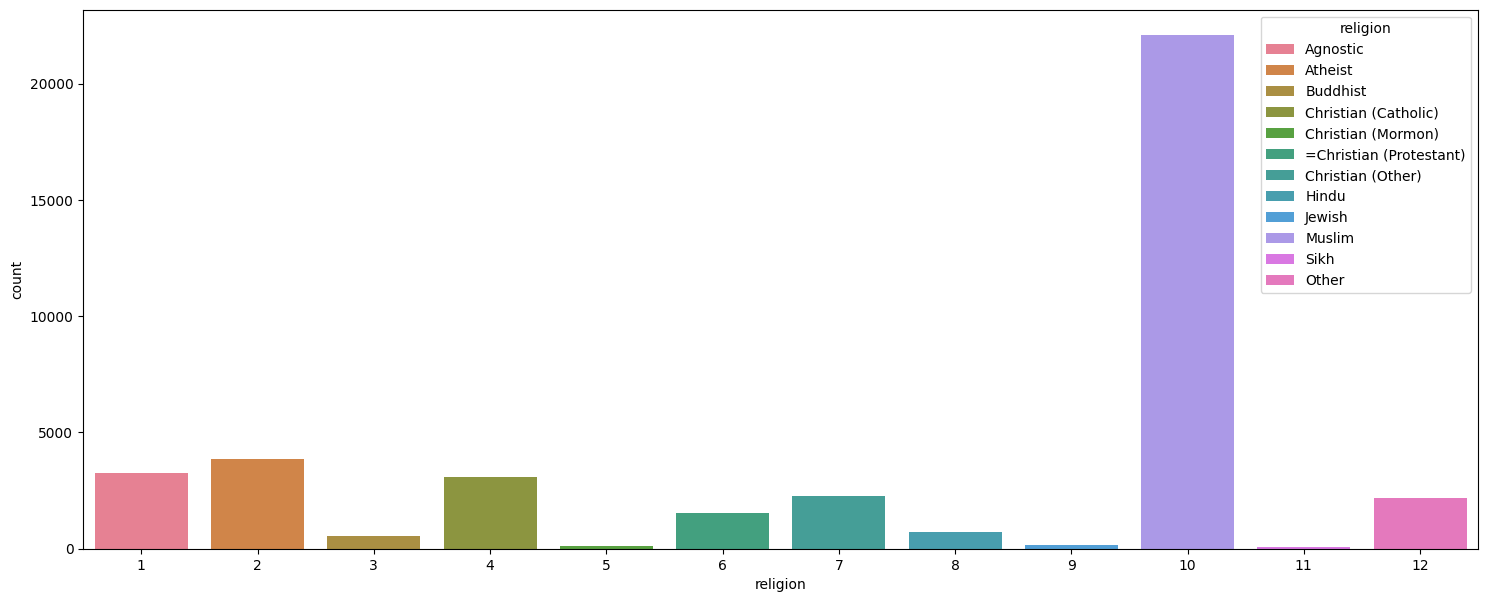

In [19]:
def updateEducationValue(value):
    if value == 0: 
        return 12
    return value

df['religion'] = df['religion'].apply(updateEducationValue)

def changeReligionValues(value) -> str:
    if value == 0:
        return 'Other'
    if value == 1:
        return 'Agnostic'
    if value == 2:
        return 'Atheist'
    if value == 3:
        return 'Buddhist'
    if value == 4:
        return 'Christian (Catholic)'
    if value == 5:
        return 'Christian (Mormon)'
    if value == 6:
        return '=Christian (Protestant)'
    if value == 7:
        return 'Christian (Other)'
    if value == 8:
        return 'Hindu'
    if value == 9:
        return 'Jewish'
    if value == 10:
        return 'Muslim'
    if value == 11:
        return 'Sikh'
    if value == 12:
        return 'Other'
    return value

religion = df['religion'].apply(changeReligionValues)
display(df['religion'].value_counts())

plt.figure(figsize=(18, 7))
sns.countplot(x=df['religion'], hue= religion)

<h5>Most of the People are Muslims</h5>

<div>
<p>6) Feature = Race</p>
<p>
"What is your race?"
</p>
<ul>
<li>10=Asian</li>
<li>20=Arab</li>
<li>30=Black</li>
<li>40=Indigenous Australian</li>
<li>50=Native American</li>
<li>60=White</li>
<li>70=Other</li>
</ul>
</div>

In [20]:
# Just to Make the value mapping easy we divide the race values by 10 
# And They even don't affect the data at all 
df['race'] = df['race'].apply(lambda x: x/10)
df['race'].head()

0    1.0
1    7.0
2    6.0
3    7.0
4    1.0
Name: race, dtype: float64

race
1.0    23106
6.0    10659
7.0     4832
3.0      603
2.0      333
5.0      220
4.0       22
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='count'>

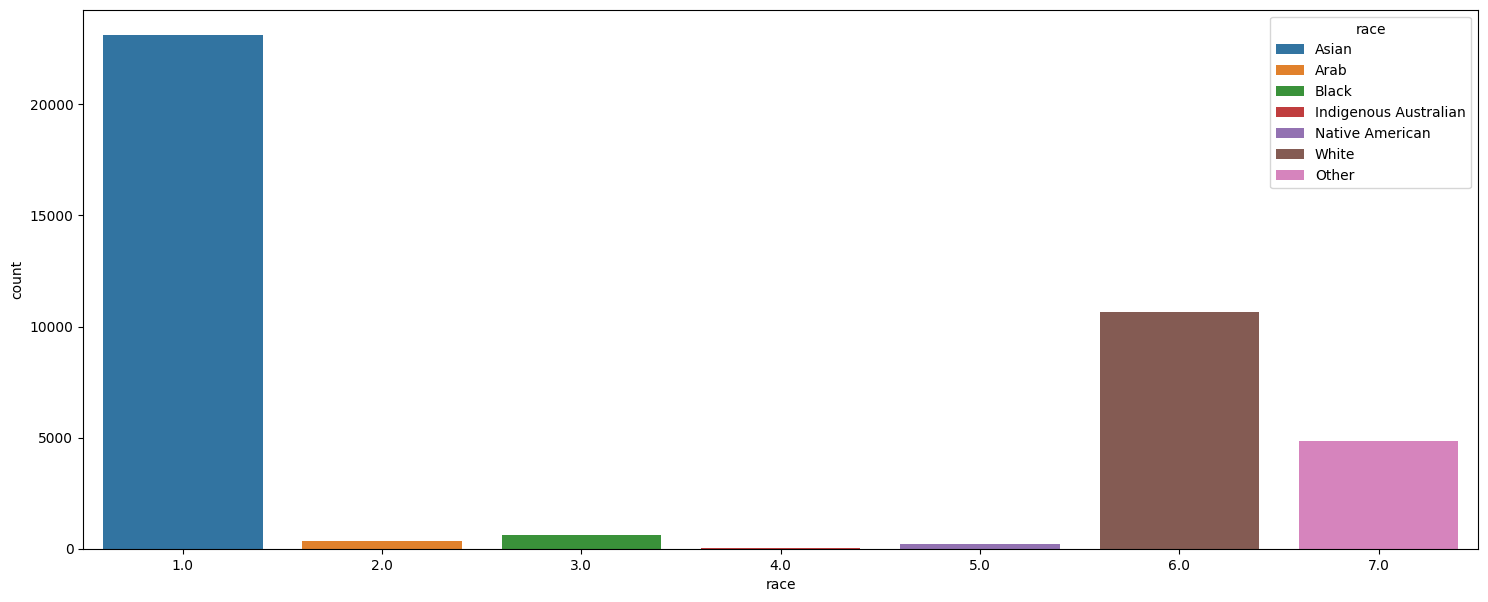

In [21]:
def changeRaceValues(value)->str: 
    if value == 1:
        return 'Asian'
    if value == 2:
        return 'Arab'
    if value == 3:
        return 'Black'
    if value == 4:
        return 'Indigenous Australian'
    if value == 5:
        return 'Native American'
    if value == 6:
        return 'White'
    if value == 7:
        return 'Other'

    return value

race = df['race'].apply(changeRaceValues)
display(df['race'].value_counts())


plt.figure(figsize=(18, 7))
sns.countplot(x=df['race'], hue=race)

<h5>Majority are Asians</h5>

In [22]:
# Let's Look at the Things we don't until Now
df.head() 

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,VCL15,VCL16,education,urban,gender,age,religion,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,1,1,2,3,2,16,12,1.0,1,2
1,4,1,2,3,4,4,3,4,3,2,...,1,1,2,3,2,16,7,7.0,1,4
2,3,1,4,1,4,3,1,3,2,4,...,1,1,2,3,2,17,4,6.0,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,1,3,2,13,4,7.0,1,5
4,2,2,3,4,4,2,4,4,4,3,...,1,1,3,2,2,19,10,1.0,1,4


<h3>Analysis of TIPI Series</h3>

<h4>Documentation of TIPI</h4>
<p>
The Ten Item Personality Inventory was administered. A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.):
</p>
<br>
<ul>
<li>TIPI1	Extraverted, enthusiastic.</li>
<li>TIPI2	Critical, quarrelsome.</li>
<li>TIPI3	Dependable, self-disciplined.</li>
<li>TIPI4	Anxious, easily upset.</li>
<li>TIPI5	Open to new experiences, complex.</li>
<li>TIPI6	Reserved, quiet.</li>
<li>TIPI7	Sympathetic, warm.</li>
<li>TIPI8	Disorganized, careless.</li>
<li>TIPI9	Calm, emotionally stable.</li>
<li>TIPI10	Conventional, uncreative.</li>
</ul>
<br>
<p>
The TIPI items were rated "I see myself as:" _____ such that
</p>
<br>
<ul>
<li>1 = Disagree strongly</li>
<li>2 = Disagree moderately</li>
<li>3 = Disagree a little</li>
<li>4 = Neither agree nor disagree</li>
<li>5 = Agree a little</li>
<li>6 = Agree moderately</li>
<li>7 = Agree strongly</li>
</ul>

In [23]:
df['TIPI1'].value_counts()

TIPI1
5    8420
1    6229
6    6046
4    5877
2    5603
3    4633
7    2482
0     485
Name: count, dtype: int64

<Axes: xlabel='TIPI1', ylabel='count'>

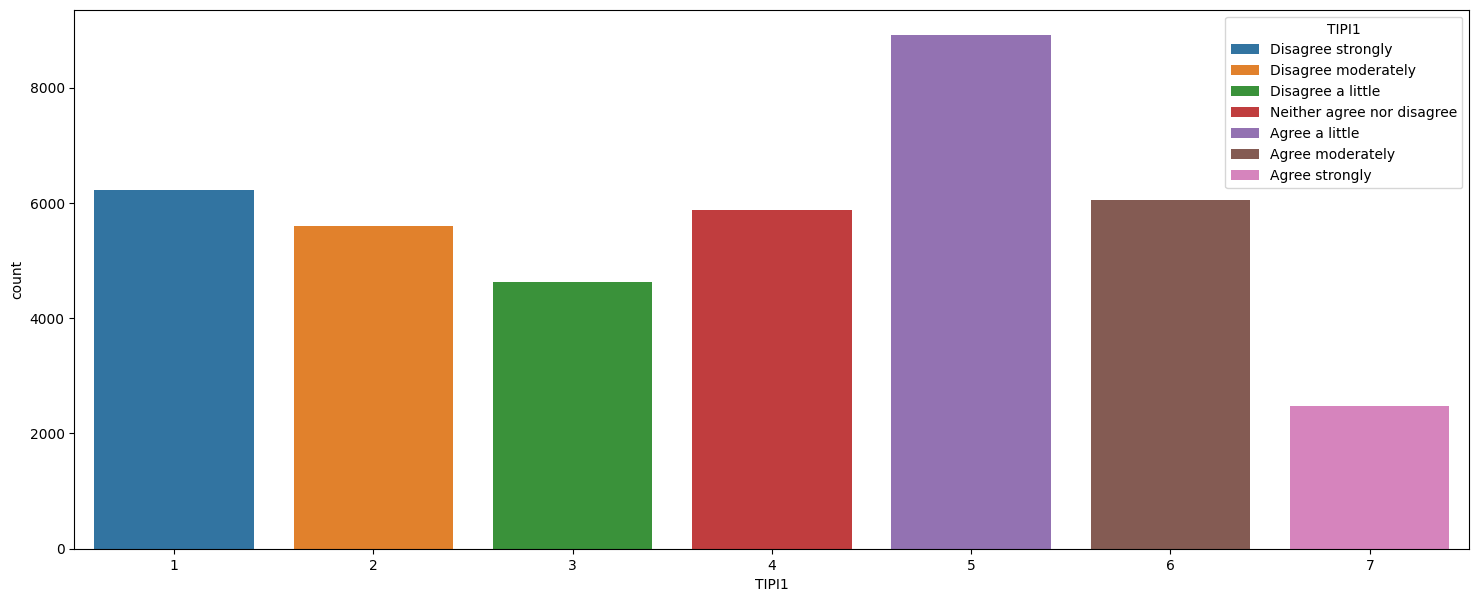

In [24]:
#change 0 value to 5 as it's the most chosen value in the survey
def changeFromToInTIPI(value, From, to):
    if value == From:
        return to
    return value

df['TIPI1'] = df['TIPI1'].apply(lambda value: changeFromToInTIPI(value, 0, 5))

def changeTIPIValues(value):
    if value == 1:
        return 'Disagree strongly'
    if value == 2:
        return 'Disagree moderately'
    if value == 3:
        return 'Disagree a little'
    if value == 4:
        return 'Neither agree nor disagree'
    if value == 5:
        return 'Agree a little'
    if value == 6:
        return 'Agree moderately'
    if value == 7:
        return 'Agree strongly'

    return value

tipi = df['TIPI1'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI1'], hue=tipi)

In [25]:
df['TIPI2'].value_counts()

TIPI2
5    10373
6     6990
4     6171
3     4326
2     4040
1     3985
7     3320
0      570
Name: count, dtype: int64

<Axes: xlabel='TIPI2', ylabel='count'>

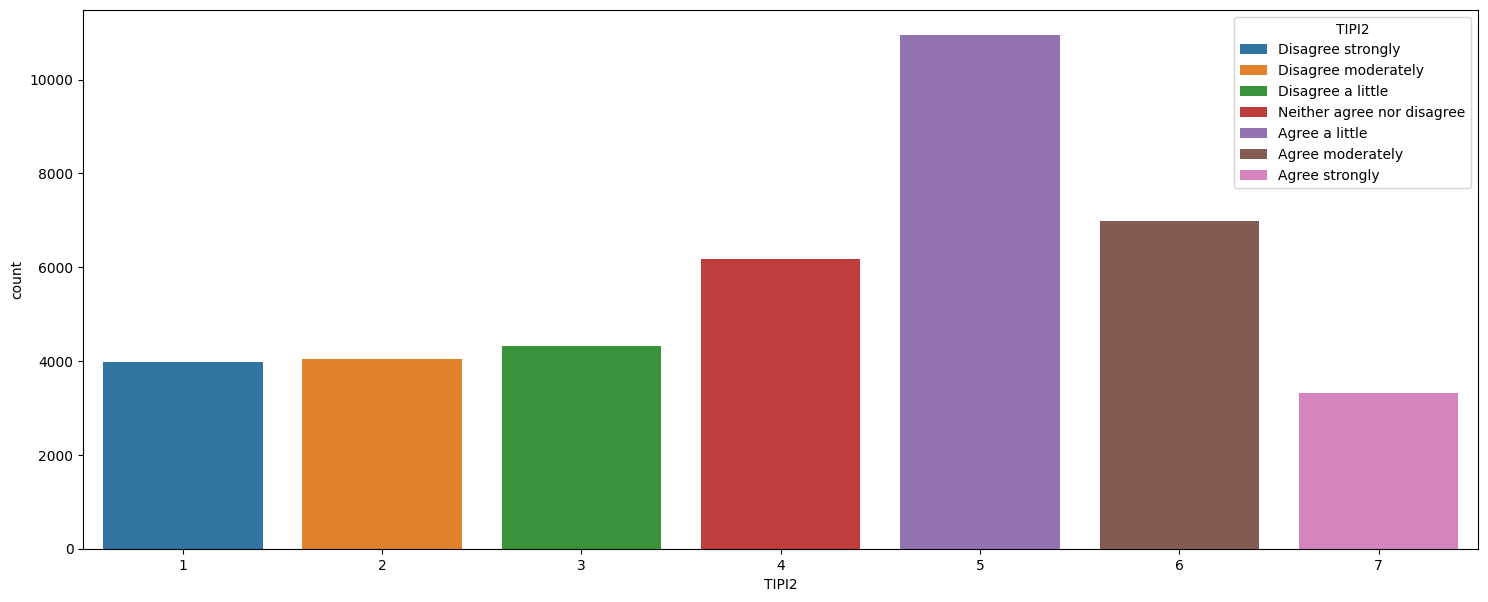

In [26]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI2'] = df['TIPI2'].apply(lambda value: changeFromToInTIPI(value, 0, 5))

# convert numbers to string for better viz
tipi = df['TIPI2'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI2'], hue=tipi)

In [27]:
df['TIPI3'].value_counts()

TIPI3
6    10230
5     9121
7     6242
4     4516
3     3981
2     2843
1     2252
0      590
Name: count, dtype: int64

<Axes: xlabel='TIPI3', ylabel='count'>

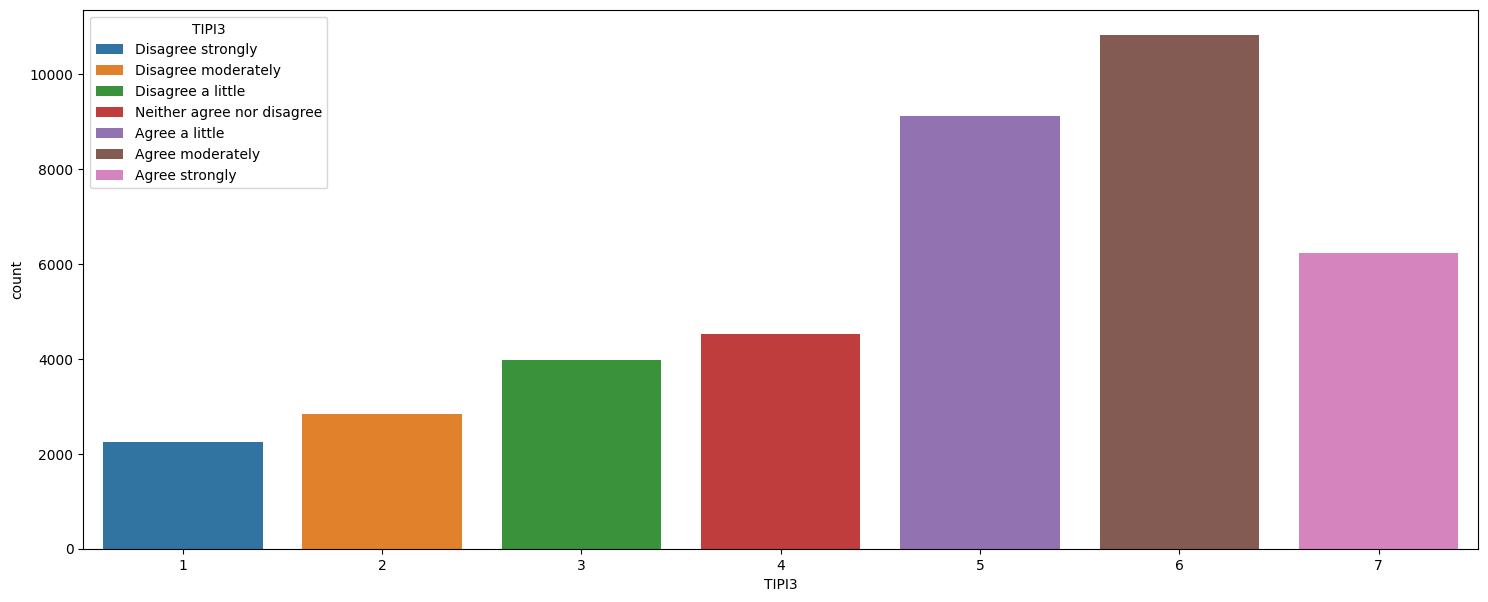

In [28]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI3'] = df['TIPI3'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI3'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI3'], hue=tipi)

In [29]:
df['TIPI4'].value_counts()

TIPI4
7    11360
6     9561
5     8751
4     2720
2     2444
3     2434
1     2042
0      463
Name: count, dtype: int64

<Axes: xlabel='TIPI4', ylabel='count'>

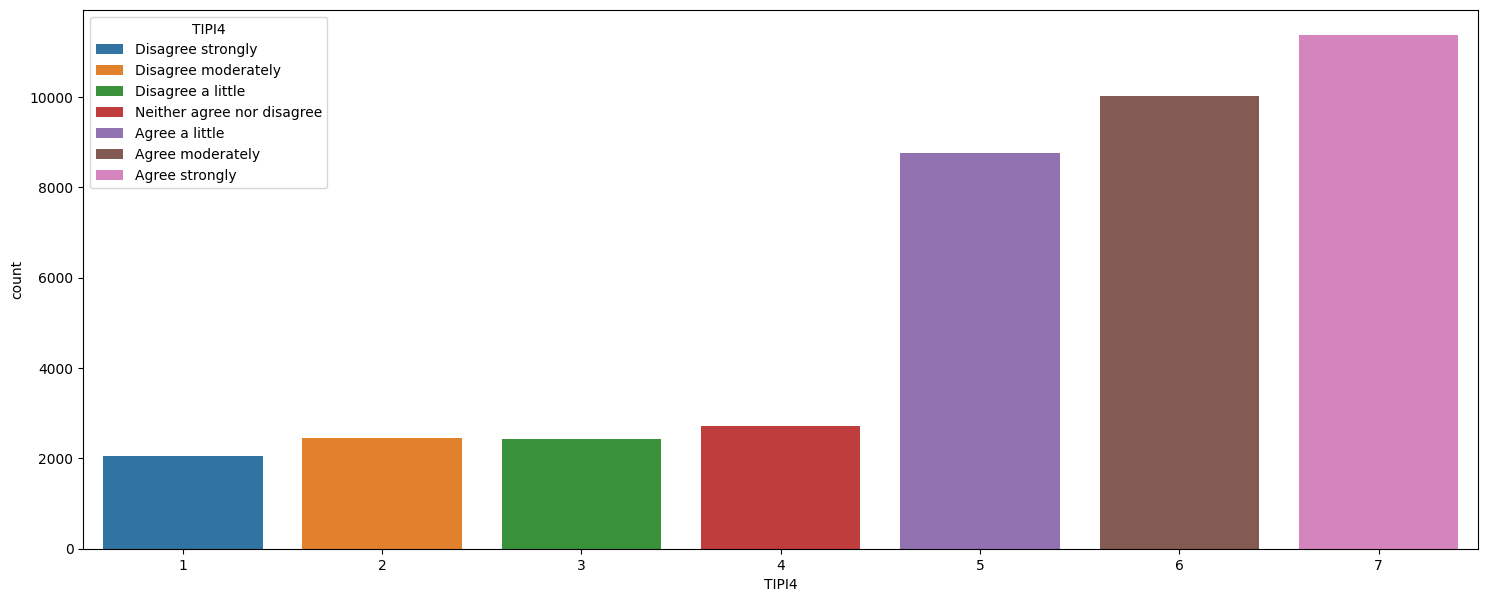

In [30]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI4'] = df['TIPI4'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI4'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI4'], hue=tipi)

In [31]:
df['TIPI5'].value_counts()

TIPI5
6    9697
5    9525
7    7682
4    5140
3    3341
2    2226
1    1647
0     517
Name: count, dtype: int64

<Axes: xlabel='TIPI5', ylabel='count'>

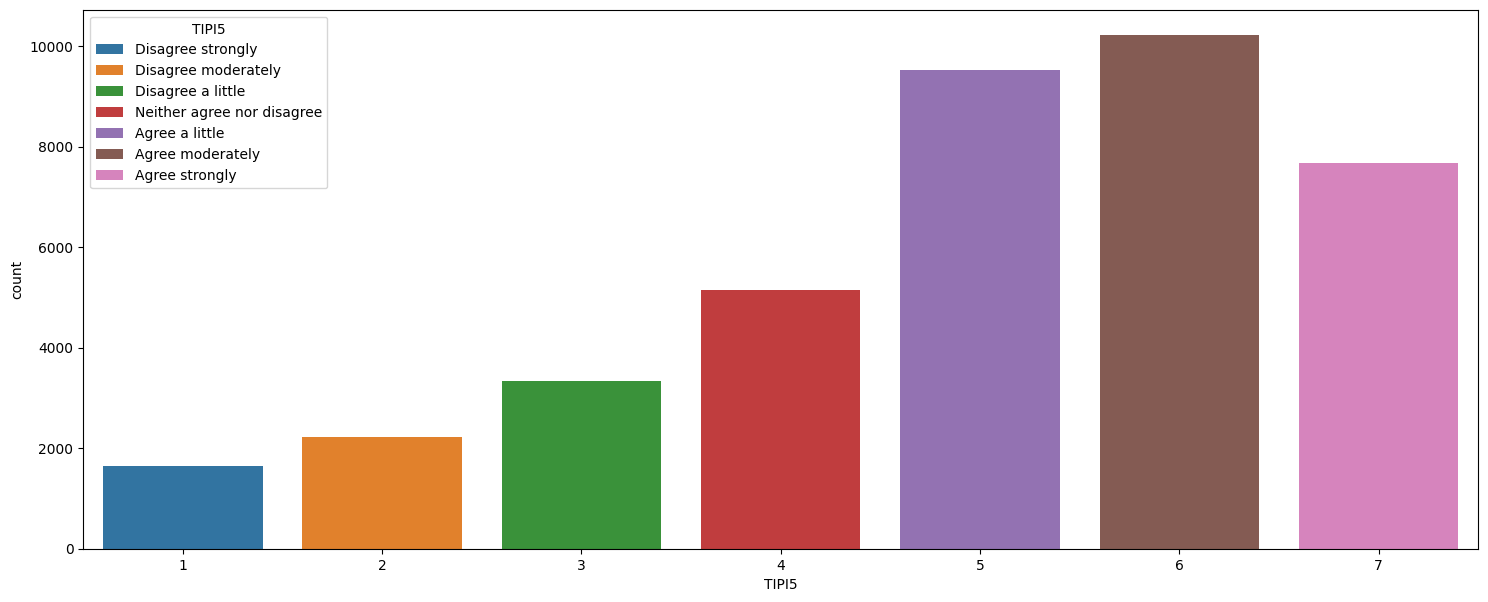

In [32]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI5'] = df['TIPI5'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI5'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI5'], hue=tipi)

In [33]:
df['TIPI6'].value_counts()

TIPI6
7    9626
6    8094
5    7733
4    4943
3    3475
2    2748
1    2666
0     490
Name: count, dtype: int64

<Axes: xlabel='TIPI6', ylabel='count'>

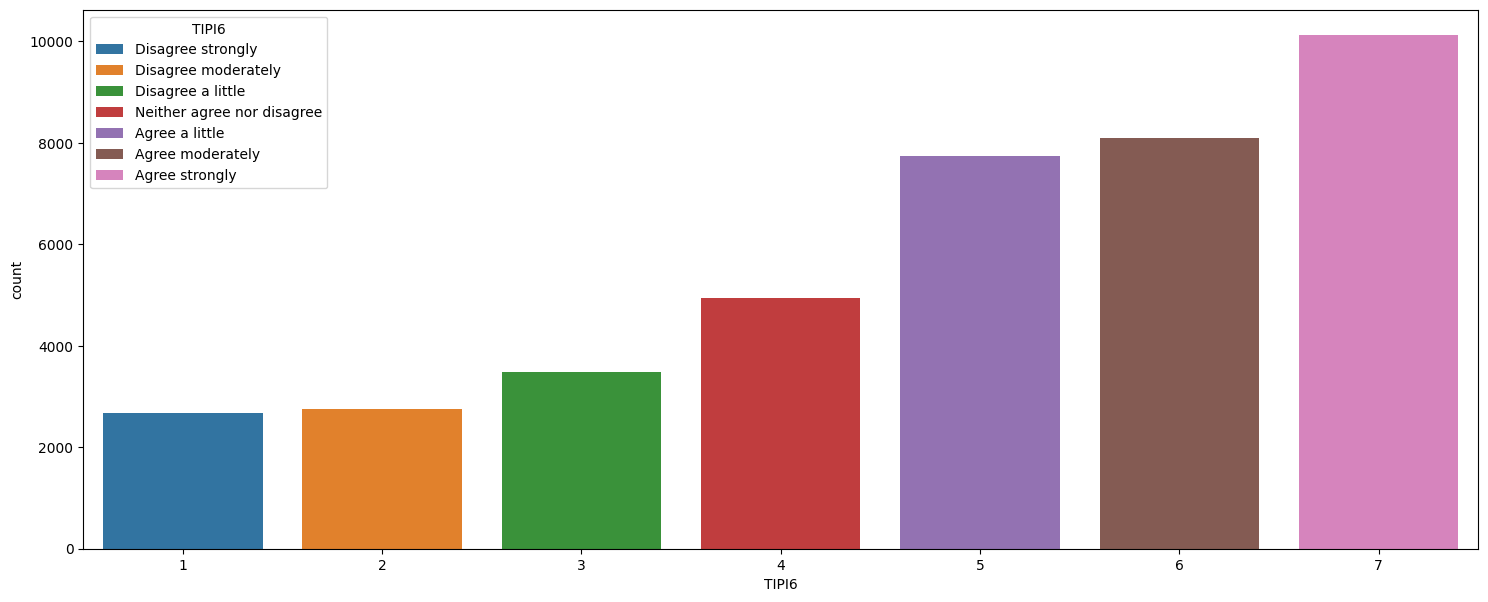

In [34]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI6'] = df['TIPI6'].apply(lambda value: changeFromToInTIPI(value, 0, 7))

# convert numbers to string for better viz
tipi = df['TIPI6'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI6'], hue=tipi)

In [35]:
df['TIPI7'].value_counts()

TIPI7
6    10997
7    10007
5     9097
4     4421
3     2270
2     1367
1     1015
0      601
Name: count, dtype: int64

<Axes: xlabel='TIPI7', ylabel='count'>

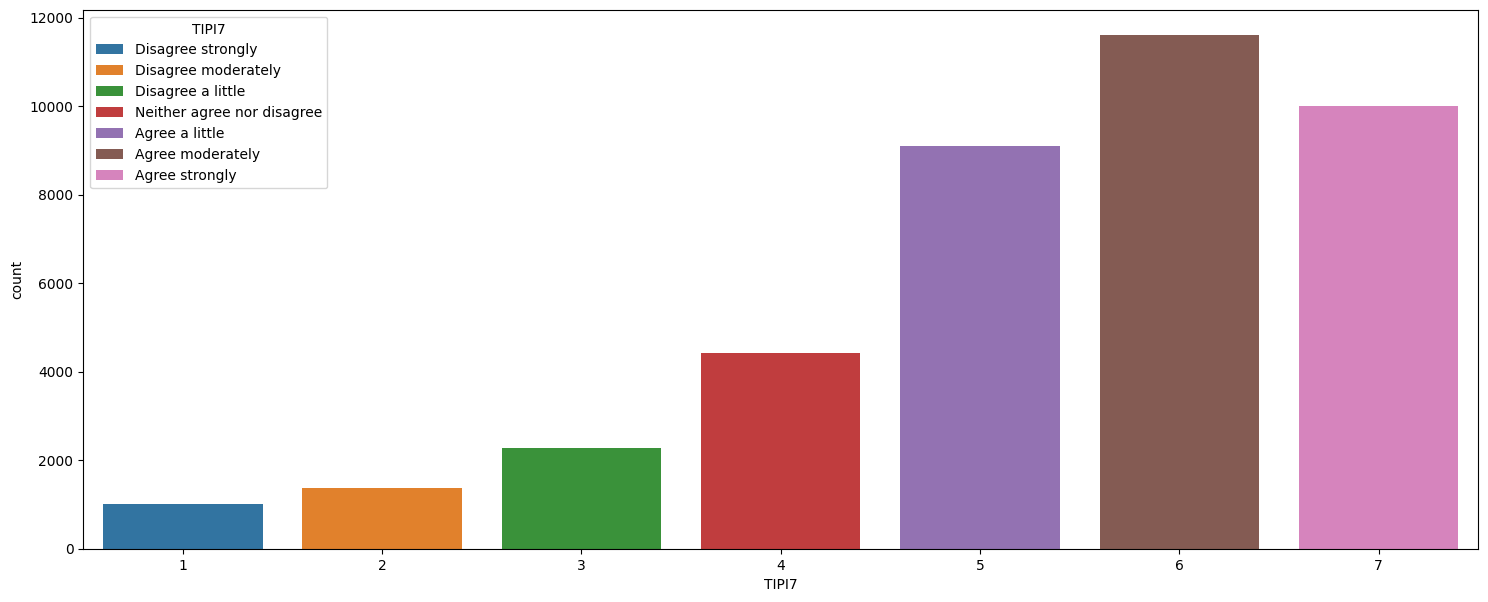

In [36]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI7'] = df['TIPI7'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI7'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI7'], hue=tipi)

In [37]:
df['TIPI8'].value_counts()

TIPI8
5    9300
6    6369
7    5841
4    4577
3    4446
2    4445
1    4138
0     659
Name: count, dtype: int64

<Axes: xlabel='TIPI8', ylabel='count'>

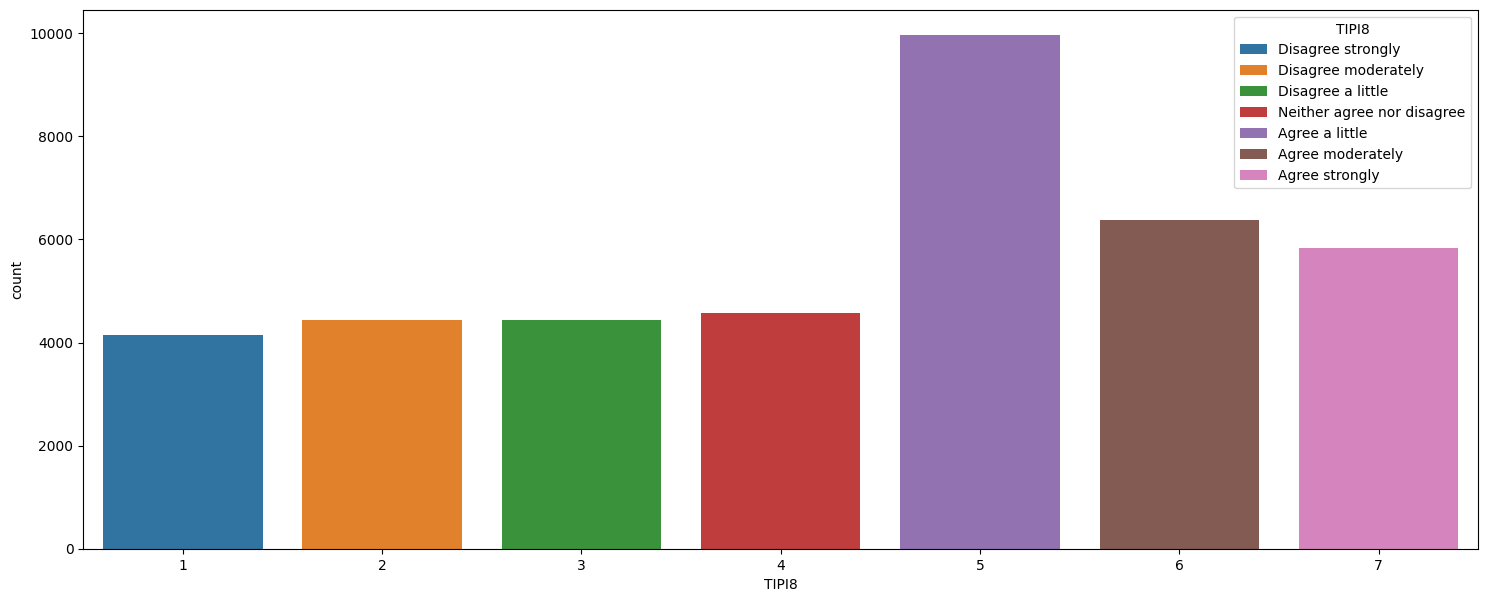

In [38]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI8'] = df['TIPI8'].apply(lambda value: changeFromToInTIPI(value, 0, 5))

# convert numbers to string for  better viz
tipi = df['TIPI8'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI8'], hue=tipi)

In [39]:
df['TIPI9'].value_counts()

TIPI9
4    6837
3    6819
2    6401
5    6250
1    5507
6    4943
7    2591
0     427
Name: count, dtype: int64

<Axes: xlabel='TIPI9', ylabel='count'>

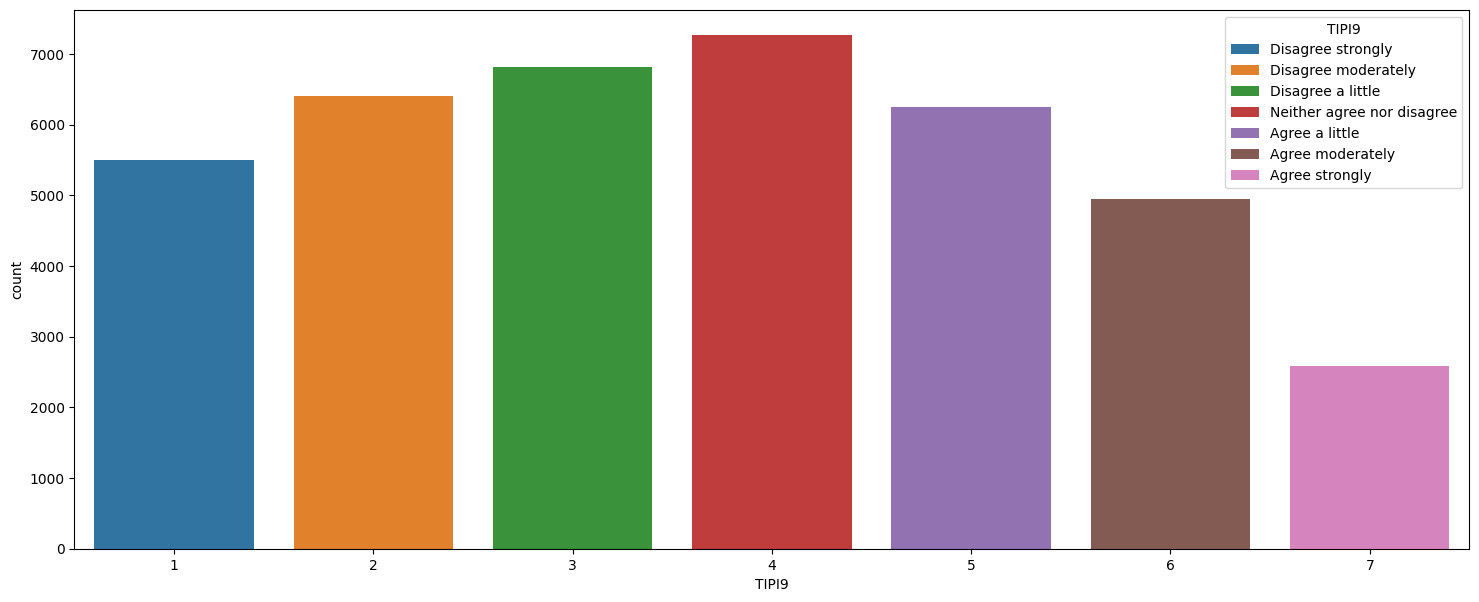

In [40]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI9'] = df['TIPI9'].apply(lambda value: changeFromToInTIPI(value, 0, 4))

# convert numbers to string for better viz
tipi = df['TIPI9'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI9'], hue=tipi)

In [41]:
df['TIPI10'].value_counts()

TIPI10
4    7665
5    6653
3    6184
2    5714
1    5404
6    4106
7    3494
0     555
Name: count, dtype: int64

<Axes: xlabel='TIPI10', ylabel='count'>

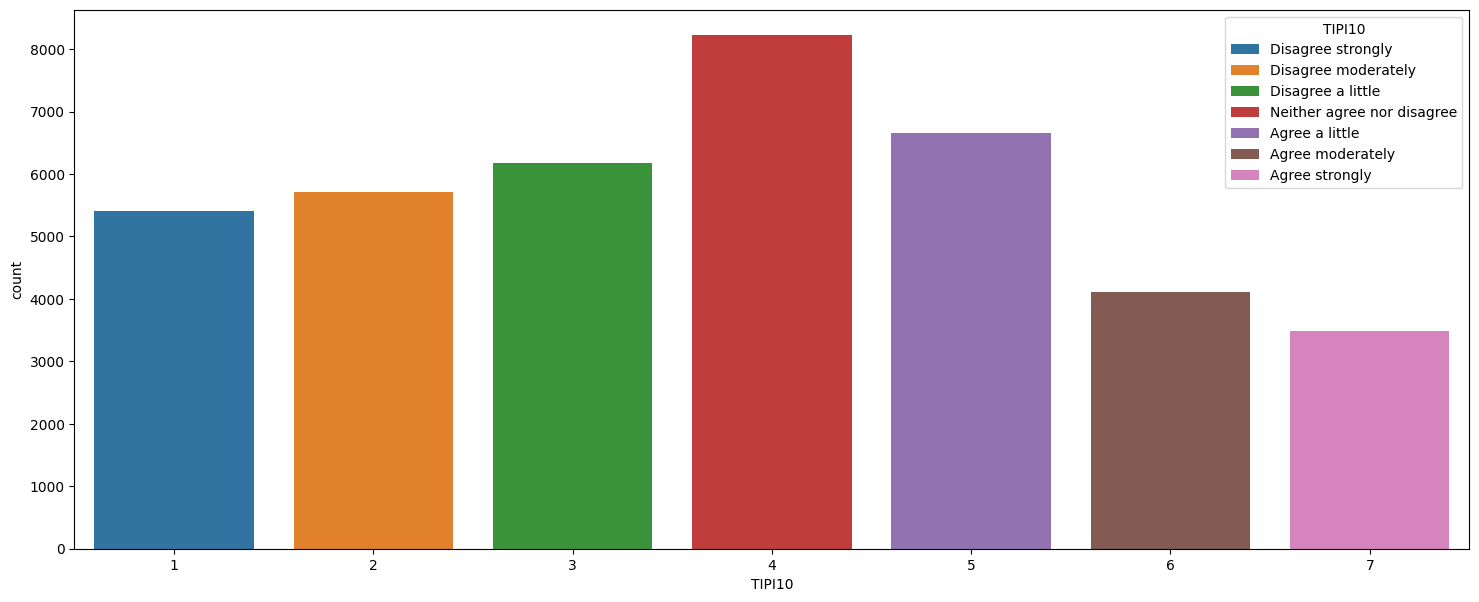

In [42]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI10'] = df['TIPI10'].apply(lambda value: changeFromToInTIPI(value, 0, 4))

# convert numbers to string for better viz
tipi = df['TIPI10'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI10'], hue=tipi)

<div>
<p>8) Feature = Family Size</p>
<p>
"Including you, how many children did your mother have?"
</p>
</div>


In [43]:
df['familysize'].value_counts()

familysize
3      9206
2      9018
4      7539
5      4830
1      2946
6      2450
7      1243
0      1125
8       676
9       331
10      195
11      109
12       56
13       19
14        8
15        6
16        5
17        3
24        1
23        1
21        1
19        1
62        1
26        1
65        1
54        1
99        1
133       1
Name: count, dtype: int64

<Axes: xlabel='familysize', ylabel='Count'>

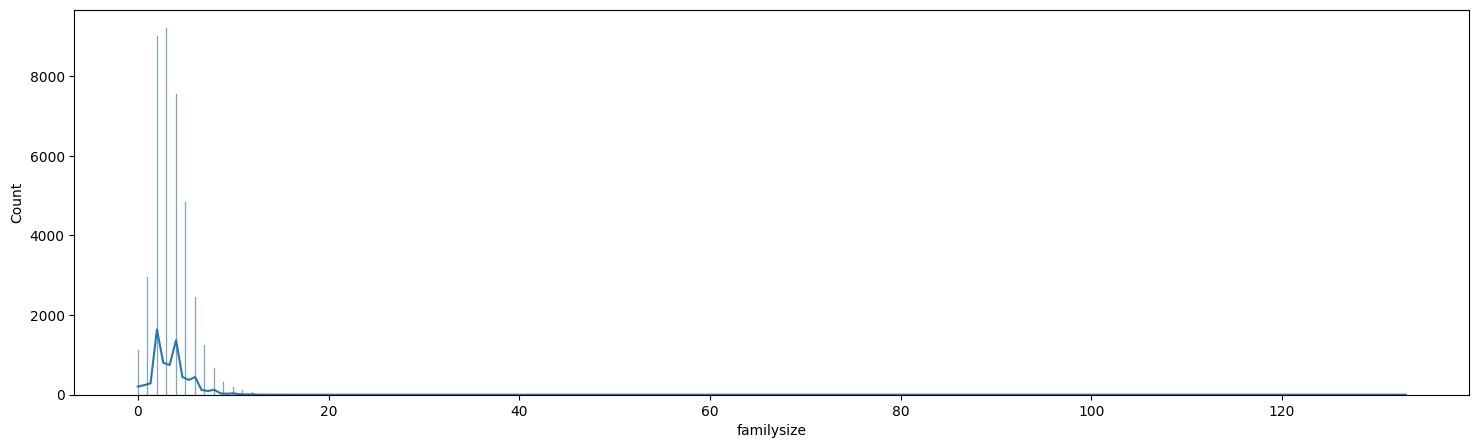

In [44]:
plt.figure(figsize=(18, 5))
sns.histplot(x=df['familysize'], kde=True)

<h5>There are a lot of outliers in Family Size So let's Remove the records that has family size more than 13</h5>

In [45]:
idx = df[df['familysize'] > 13].index


print(f'Depression size before: {df.shape[0]}')
df = df.drop(idx, axis=0)
print(f'Depression size after: {df.shape[0]}')

Depression size before: 39775
Depression size after: 39743


<h5>Nothing like a big affect on Our Data Right :)</h5>

<Axes: xlabel='familysize', ylabel='Count'>

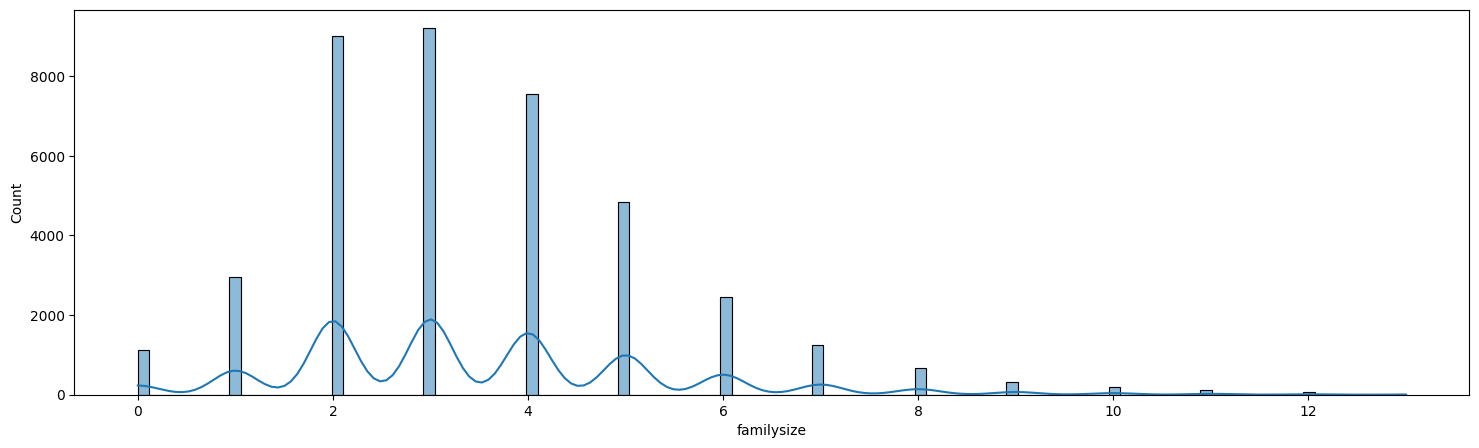

In [46]:
plt.figure(figsize=(18, 5))
sns.histplot(x=df['familysize'], kde=True)

<div>
<p>9) Feature = Martial Status</p>
<p>
"What is your marital status?"
</p>
<ul>
<li>1=Never married</li><li>2=Currently married</li><li>3=Previously married</li>
</ul>
</div>


In [47]:
df['married'].value_counts()

married
1    34104
2     4354
3     1090
0      195
Name: count, dtype: int64

<Axes: xlabel='married', ylabel='count'>

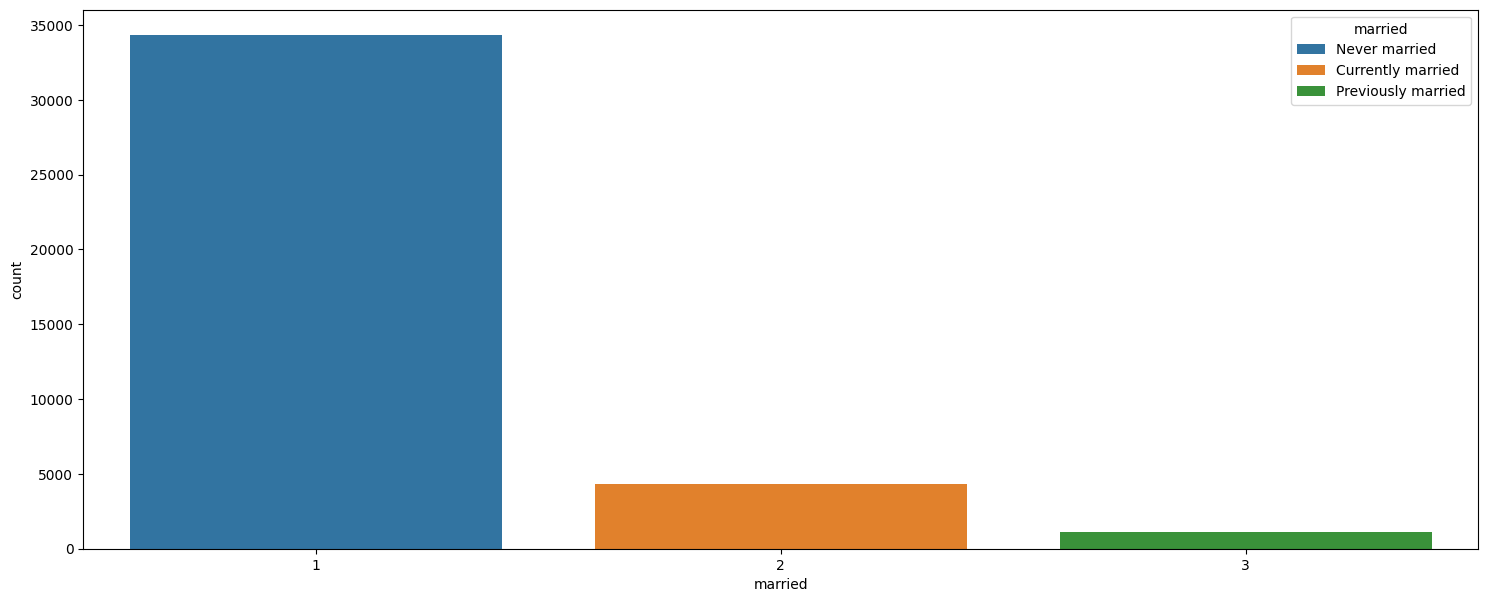

In [48]:
def change0to1inMarried(value):
    if value == 0:
        return 1
    return value

# change 0 to 1 value as it is the most answered one
df['married'] = df['married'].apply(change0to1inMarried)

def changeMarriedValueToString(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    return value


married = df['married'].apply(changeMarriedValueToString)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['married'], hue=married)

<h5>Most of People who have depression are un-married</h5>

In [49]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,VCL15,VCL16,education,urban,gender,age,religion,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,1,1,2,3,2,16,12,1.0,1,2
1,4,1,2,3,4,4,3,4,3,2,...,1,1,2,3,2,16,7,7.0,1,4
2,3,1,4,1,4,3,1,3,2,4,...,1,1,2,3,2,17,4,6.0,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,1,3,2,13,4,7.0,1,5
4,2,2,3,4,4,2,4,4,4,3,...,1,1,3,2,2,19,10,1.0,1,4


<div>
<p>10) Age Feature</p>
<p>
"How many years old are you?"
</p>
</div>


<Axes: xlabel='age'>

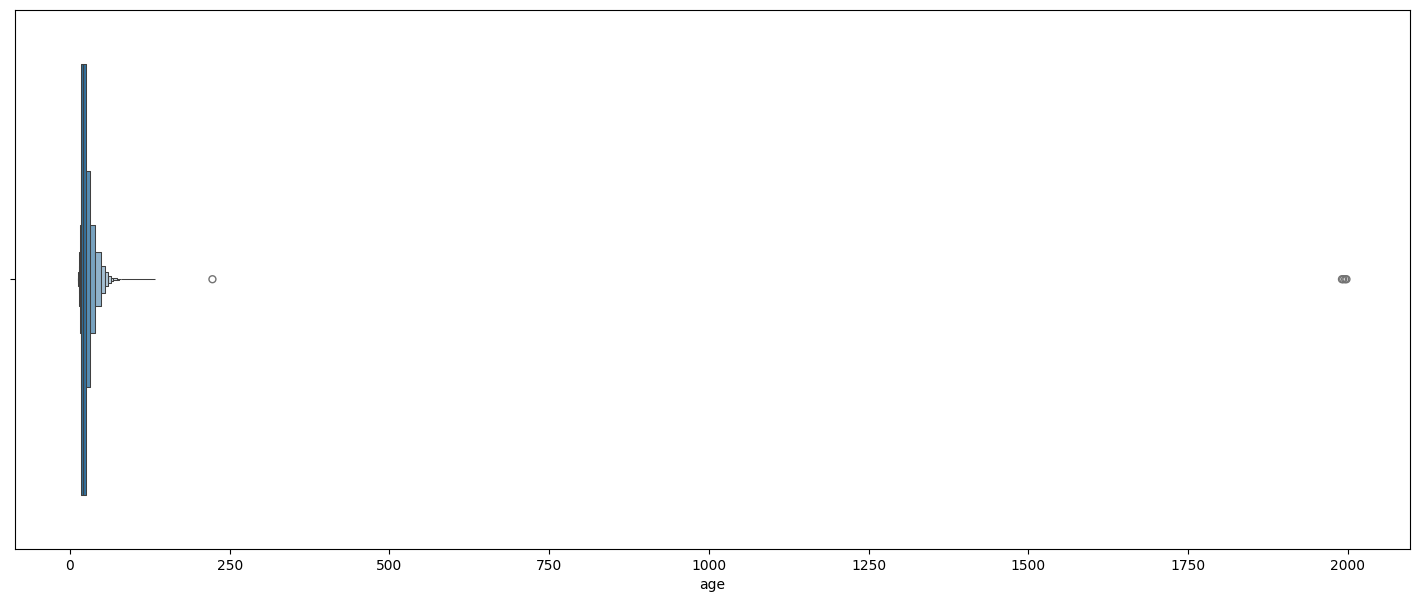

In [50]:
plt.figure(figsize=(18, 7))
sns.boxenplot(x=df['age']) 

<h6> Removing the Outliers</h6>

In [51]:
age_indexes = df[df['age'] > 80]['age'].index

print(f'No. of Outliers : {len(age_indexes)}')

print(f'Depression size before: {df.shape[0]}')
df.drop(age_indexes, axis=0, inplace=True) 
print(f'Depression size after: {df.shape[0]}') 

No. of Outliers : 10
Depression size before: 39743
Depression size after: 39733


<h6>After Removing Outliers</h6>

<Axes: xlabel='age'>

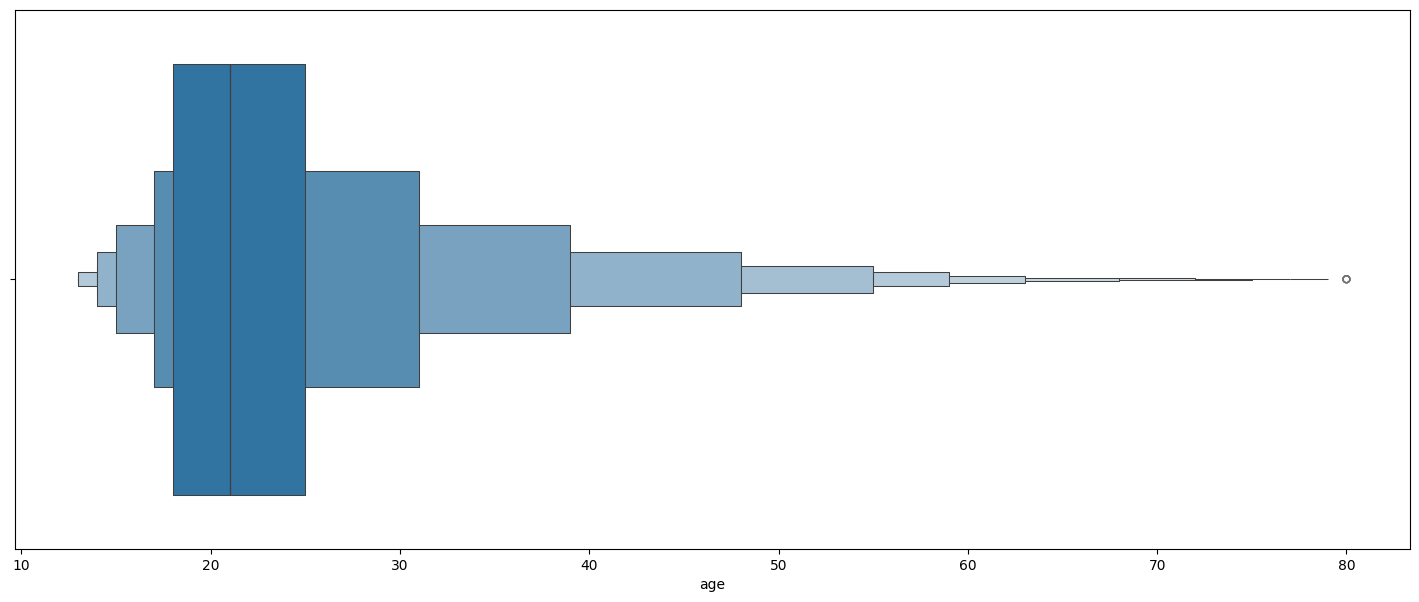

In [52]:
plt.figure(figsize=(18, 7))
sns.boxenplot(x=df['age']) 

<h3>Feature Engineering Part</h3>

<h5>Creating age group feature to visualize different age groups as a cluster</h5>

<Axes: xlabel='age', ylabel='count'>

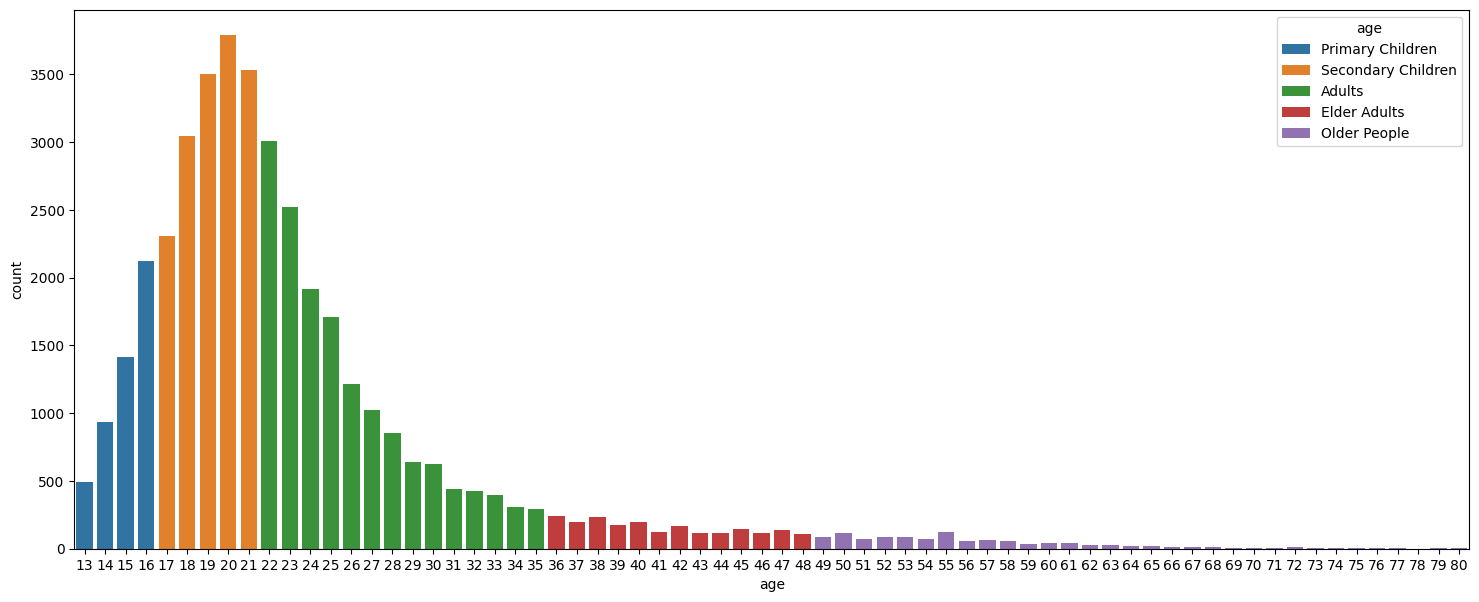

In [53]:
def makeAgeGroup(value):
    if value <= 10:
        return 'Under 10'
    if  10 <= value <= 16:
        return 'Primary Children'
    if 17 <= value <= 21:
        return 'Secondary Children'
    if 21 <= value <= 35:
        return 'Adults' 
    if 36 <= value <= 48:
        return 'Elder Adults'
    if value >= 49:
        return 'Older People'

age = df['age'].apply(makeAgeGroup)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['age'], hue=age)

<h5>So Most of The People who participated are Secondary and Adults</h5>
<hr>
<h5>Then Let's Create a new Feature of Age Groups which group these age groups as a single quantity</h5>

In [54]:
def makeAgeGroupFeature(value):
    if value <= 10:
        return 1
    if  10 <= value <= 16:
        return 2
    if 17 <= value <= 21:
        return 3
    if 21 <= value <= 35:
        return 4 
    if 36 <= value <= 48:
        return 5
    if value >= 49:
        return 6

df['age_group'] = df['age'].apply(makeAgeGroupFeature)

df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,VCL16,education,urban,gender,age,religion,race,married,familysize,age_group
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,16,12,1.0,1,2,2
1,4,1,2,3,4,4,3,4,3,2,...,1,2,3,2,16,7,7.0,1,4,2
2,3,1,4,1,4,3,1,3,2,4,...,1,2,3,2,17,4,6.0,1,3,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,13,4,7.0,1,5,2
4,2,2,3,4,4,2,4,4,4,3,...,1,3,2,2,19,10,1.0,1,4,3


<h5> Now Age Feature is not of Use So we will Drop it </h5>

In [55]:
df.drop('age', axis=1, inplace=True)
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,VCL15,VCL16,education,urban,gender,religion,race,married,familysize,age_group
0,4,4,2,4,4,4,4,4,2,1,...,1,1,2,3,2,12,1.0,1,2,2
1,4,1,2,3,4,4,3,4,3,2,...,1,1,2,3,2,7,7.0,1,4,2
2,3,1,4,1,4,3,1,3,2,4,...,1,1,2,3,2,4,6.0,1,3,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,1,3,2,4,7.0,1,5,2
4,2,2,3,4,4,2,4,4,4,3,...,1,1,3,2,2,10,1.0,1,4,3


<h3>Creating a Total Count Feature</h3>

<h5>Intuition behind this feature</h5>
<p>
Basically to check whether our data is im-balanced or not
</p>

In [56]:
df['total_count'] = df.sum(axis = 1)
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,VCL16,education,urban,gender,religion,race,married,familysize,age_group,total_count
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,12,1.0,1,2,2,224.0
1,4,1,2,3,4,4,3,4,3,2,...,1,2,3,2,7,7.0,1,4,2,197.0
2,3,1,4,1,4,3,1,3,2,4,...,1,2,3,2,4,6.0,1,3,3,178.0
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,4,7.0,1,5,2,160.0
4,2,2,3,4,4,2,4,4,4,3,...,1,3,2,2,10,1.0,1,4,3,222.0


In [57]:
df['total_count'].describe()

count    39733.000000
mean       178.171520
std         30.801612
min         76.000000
25%        154.000000
50%        177.000000
75%        201.000000
max        277.000000
Name: total_count, dtype: float64

<Axes: xlabel='total_count', ylabel='Count'>

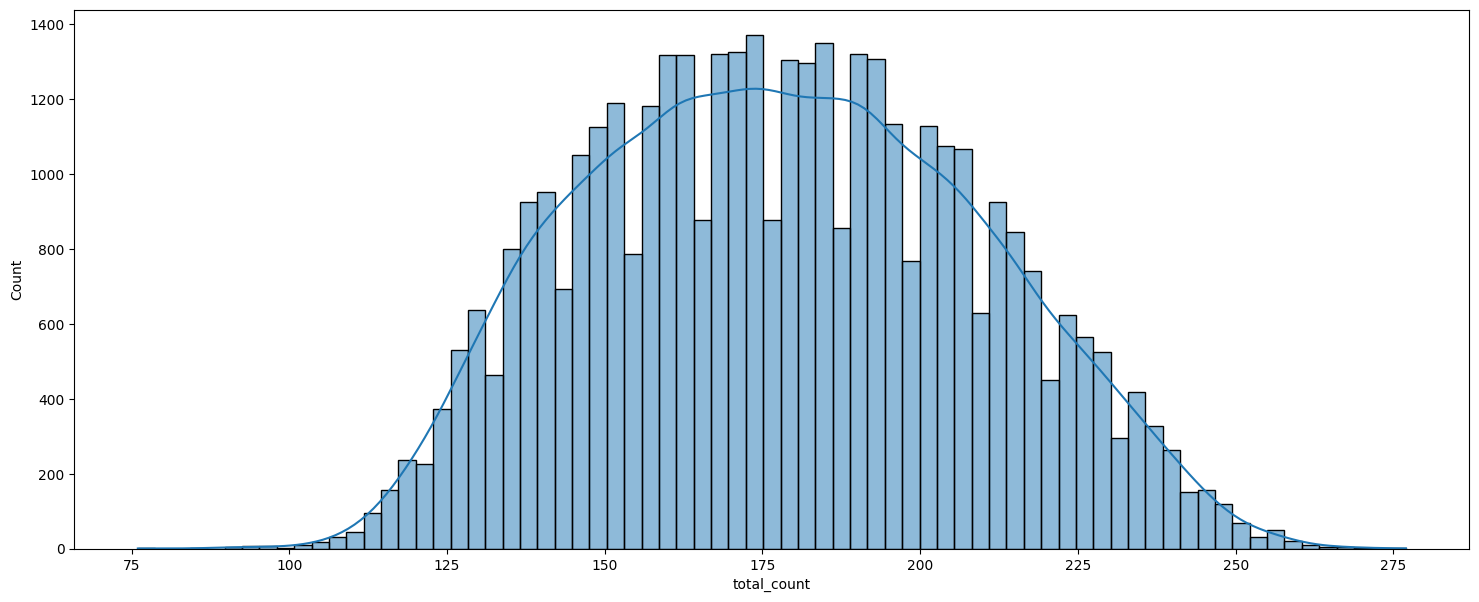

In [58]:
plt.figure(figsize=(18, 7))
sns.histplot(x = df['total_count'], kde = True)

<h5>So As Total count is normally distributed So Let's divide it in 5 parts</h5>
<ul>
<li>Normal</li>
<li>Mild</li>
<li>Moderate</li>
<li>Severe</li>
<li>Extremely Severe</li>
</ul>

In [59]:
df['total_count'].describe()

count    39733.000000
mean       178.171520
std         30.801612
min         76.000000
25%        154.000000
50%        177.000000
75%        201.000000
max        277.000000
Name: total_count, dtype: float64

<h6>The Mean is 178 approx. so we take <b>Moderate</b> as <b>178</b></h6>

In [60]:
df[df['total_count'] < 178]['total_count'].describe()

count    19931.000000
mean       152.702423
std         16.241909
min         76.000000
25%        141.000000
50%        155.000000
75%        166.000000
max        177.000000
Name: total_count, dtype: float64

<h6>The Mean is 152 approx. so we take <b>Mild</b> as <b>152</b></h6>

In [61]:
df[df['total_count'] < 152]['total_count'].describe()

count    8750.000000
mean      137.239886
std        10.189245
min        76.000000
25%       131.000000
50%       139.000000
75%       146.000000
max       151.000000
Name: total_count, dtype: float64

<h6>The Mean is 137 Approx so take <b>Normal</b> as <b>137 or less</b></h6>

In [62]:
df[df['total_count'] > 178]['total_count'].describe()

count    19347.000000
mean       204.413449
std         17.881630
min        179.000000
25%        190.000000
50%        202.000000
75%        216.000000
max        277.000000
Name: total_count, dtype: float64

<h6>The Mean is 204 Approx. so we take <b>Severe</b> as <b>204</b></h6> 
<h6>And <b>Extremely Severe</b> as <b>above 204</b></h6>

In [63]:
def buildTarget(value):
    if value <= 137:
        return 'Normal'
    if 137 < value <= 152:
        return 'Mild'
    if 152 < value <= 178:
        return 'Moderate'
    if 178 < value <= 204:
        return 'Severe'
    if value > 204:
        return 'Extremely Severe'

df['target'] = df['total_count'].apply(buildTarget)

df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,education,urban,gender,religion,race,married,familysize,age_group,total_count,target
0,4,4,2,4,4,4,4,4,2,1,...,2,3,2,12,1.0,1,2,2,224.0,Extremely Severe
1,4,1,2,3,4,4,3,4,3,2,...,2,3,2,7,7.0,1,4,2,197.0,Severe
2,3,1,4,1,4,3,1,3,2,4,...,2,3,2,4,6.0,1,3,3,178.0,Moderate
3,2,3,2,1,3,3,4,2,3,3,...,1,3,2,4,7.0,1,5,2,160.0,Moderate
4,2,2,3,4,4,2,4,4,4,3,...,3,2,2,10,1.0,1,4,3,222.0,Extremely Severe


<Axes: xlabel='target', ylabel='count'>

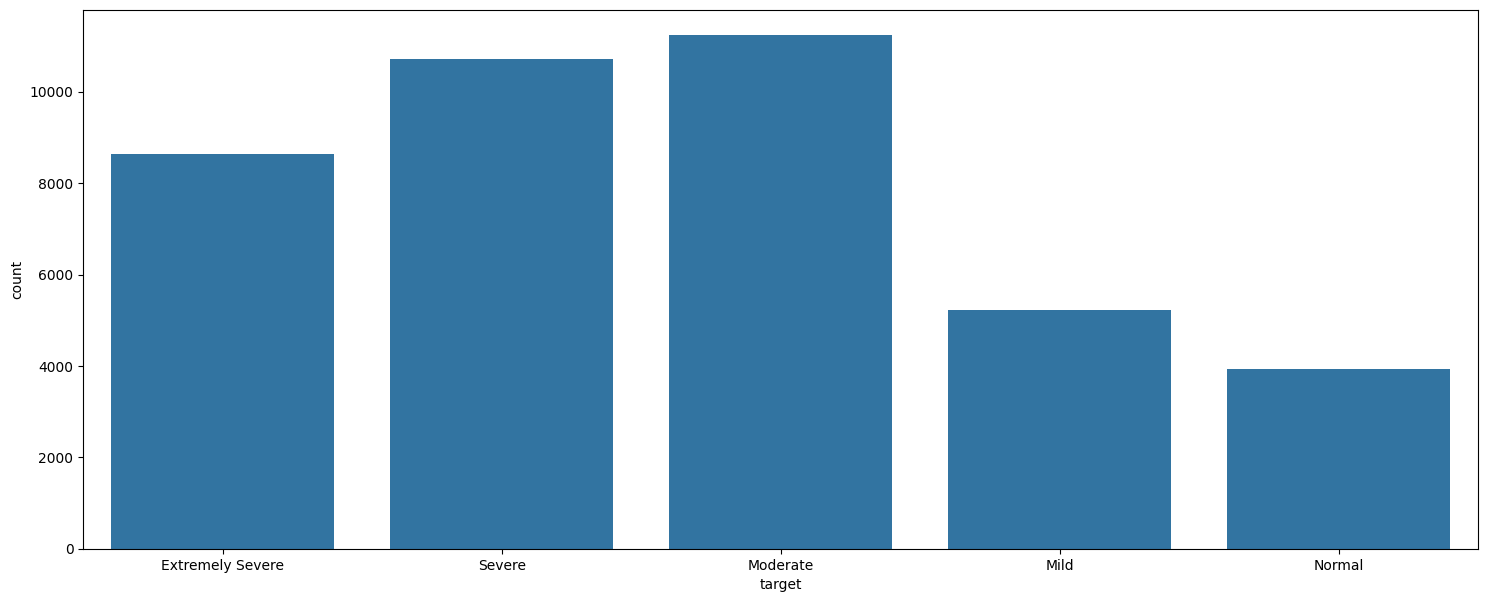

In [64]:
plt.figure(figsize=(18, 7))
sns.countplot(x=df['target'])

<h6>Data is Really Imbalanced right Now so Lets move 10 steps ahead</h6>

<Axes: xlabel='target', ylabel='count'>

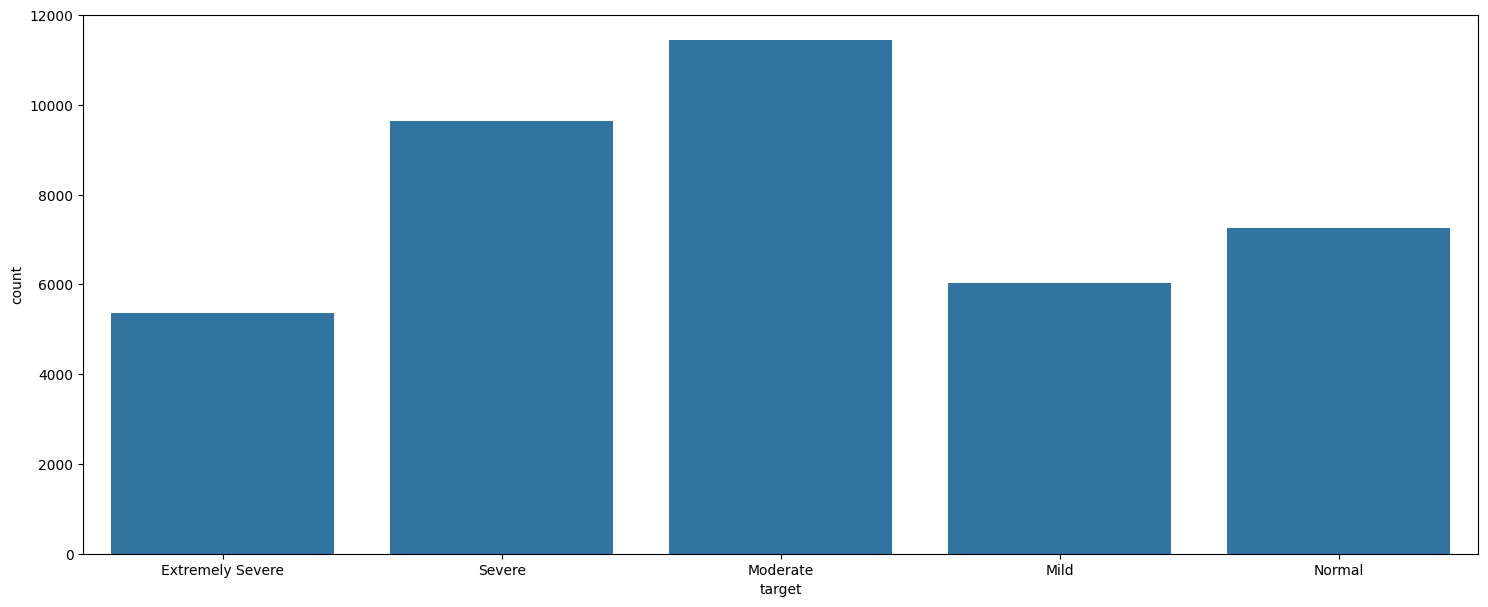

In [65]:
def buildTargetMove10Steps(value):
    if value <= 147:
        return 'Normal'
    if 147 < value <= 162:
        return 'Mild'
    if 162 < value <= 188:
        return 'Moderate'
    if 188 < value <= 214:
        return 'Severe'
    if value > 214:
        return 'Extremely Severe'


df['target'] = df['total_count'].apply(buildTargetMove10Steps)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['target'])

<h5>Now the Data at least slightly Balanced than before and it will be much better</h5><hr>

<Axes: xlabel='education', ylabel='count'>

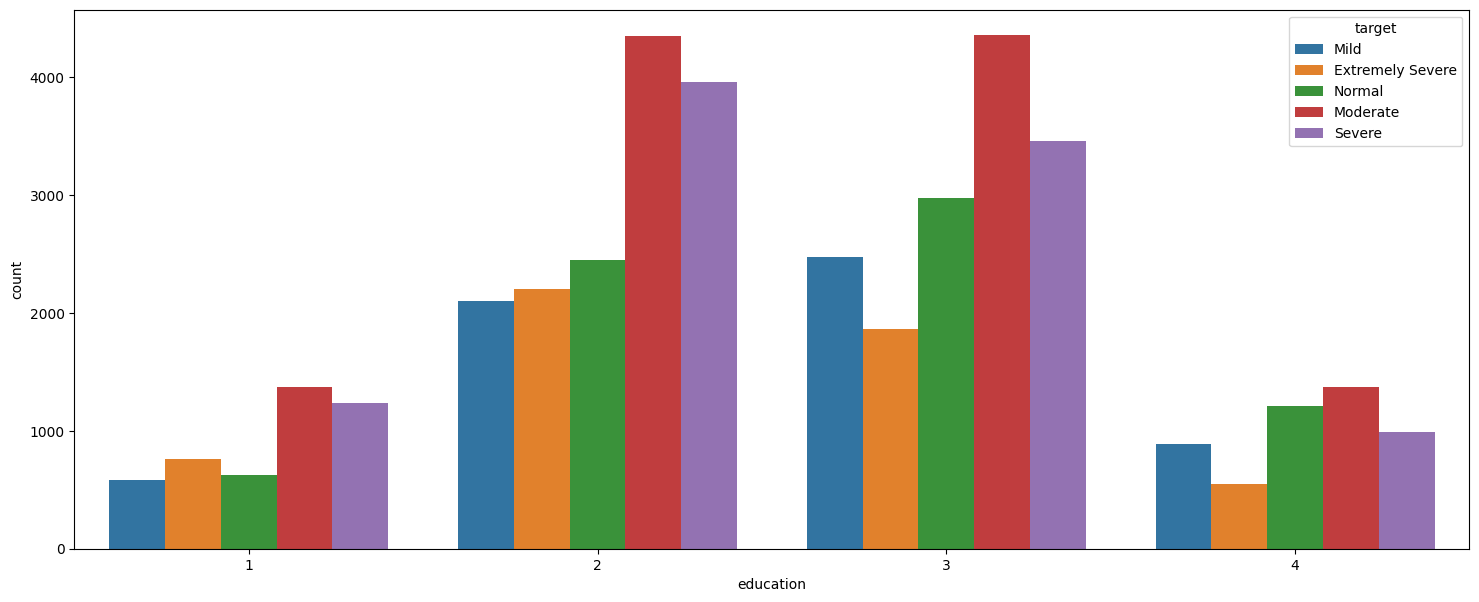

In [66]:
# A graph between Education Categories and the Target
plt.figure(figsize=(18, 7))
sns.countplot(x=df['education'], hue=df['target'])

<Axes: ylabel='count'>

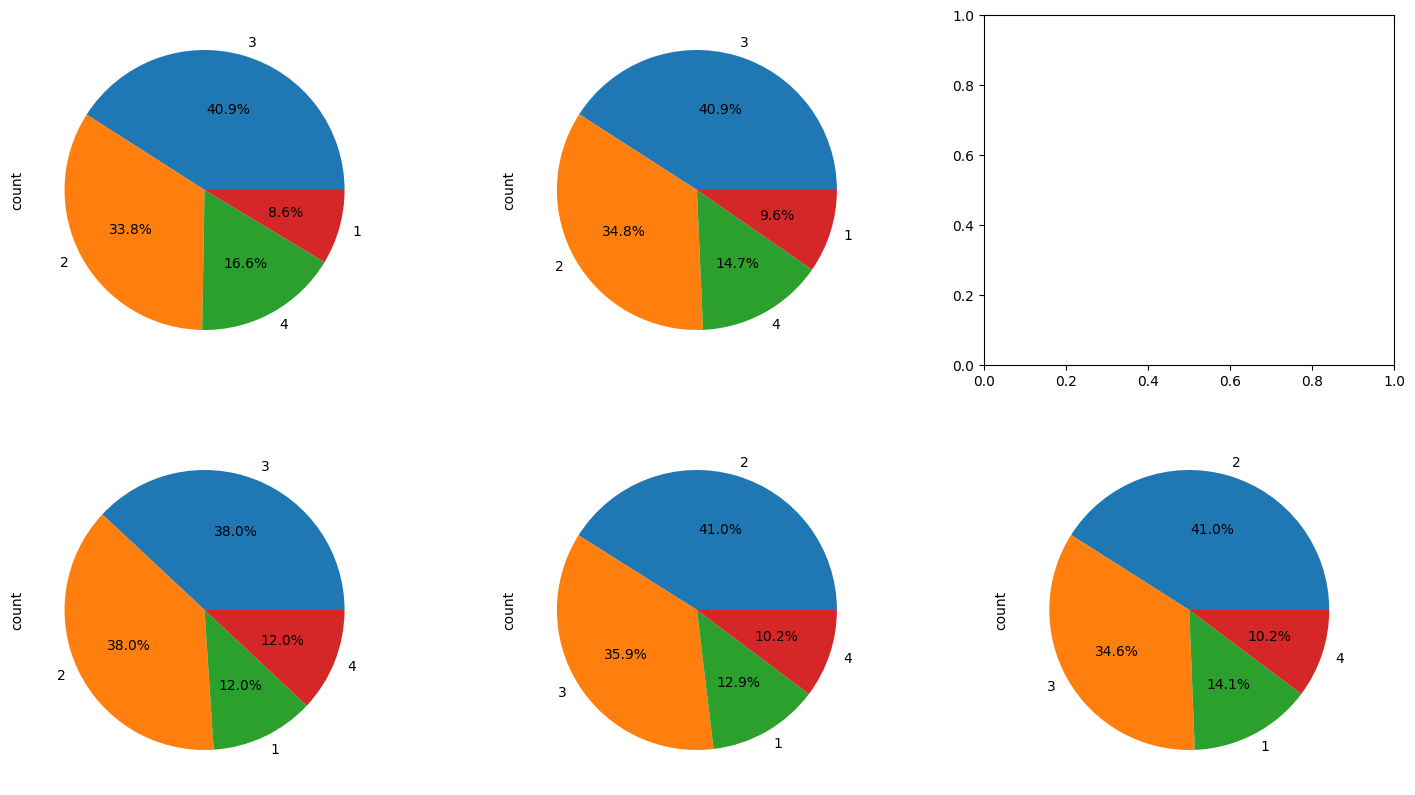

In [67]:
#Percentage of Education vs The Target
df.groupby('target')['education'].value_counts(normalize=True)
# Making a 5 pie charts for each target
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
df[df['target'] == 'Normal']['education'].value_counts().plot(kind='pie', ax=ax[0, 0], autopct='%1.1f%%')
df[df['target'] == 'Mild']['education'].value_counts().plot(kind='pie', ax=ax[0, 1], autopct='%1.1f%%')
df[df['target'] == 'Moderate']['education'].value_counts().plot(kind='pie', ax=ax[1, 0], autopct='%1.1f%%')
df[df['target'] == 'Severe']['education'].value_counts().plot(kind='pie', ax=ax[1, 1], autopct='%1.1f%%')
df[df['target'] == 'Extremely Severe']['education'].value_counts().plot(kind='pie', ax=ax[1, 2], autopct='%1.1f%%')

In [68]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,education,urban,gender,religion,race,married,familysize,age_group,total_count,target
0,4,4,2,4,4,4,4,4,2,1,...,2,3,2,12,1.0,1,2,2,224.0,Extremely Severe
1,4,1,2,3,4,4,3,4,3,2,...,2,3,2,7,7.0,1,4,2,197.0,Severe
2,3,1,4,1,4,3,1,3,2,4,...,2,3,2,4,6.0,1,3,3,178.0,Moderate
3,2,3,2,1,3,3,4,2,3,3,...,1,3,2,4,7.0,1,5,2,160.0,Mild
4,2,2,3,4,4,2,4,4,4,3,...,3,2,2,10,1.0,1,4,3,222.0,Extremely Severe


In [69]:
df.shape

(39733, 78)

In [70]:
df.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'religion', 'race', 'married', 'familysize',
       'age_group', 'total_count', 'target'],
      dtype='object')

<h1>And Here our EDA ends at 69th Cell</h1>

In [71]:
df.to_csv("final_data.csv")

<h1>Now Let's Move to the Next Part</h1>
<h2>Model Building</h2>

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [73]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,education,urban,gender,religion,race,married,familysize,age_group,total_count,target
0,4,4,2,4,4,4,4,4,2,1,...,2,3,2,12,1.0,1,2,2,224.0,Extremely Severe
1,4,1,2,3,4,4,3,4,3,2,...,2,3,2,7,7.0,1,4,2,197.0,Severe
2,3,1,4,1,4,3,1,3,2,4,...,2,3,2,4,6.0,1,3,3,178.0,Moderate
3,2,3,2,1,3,3,4,2,3,3,...,1,3,2,4,7.0,1,5,2,160.0,Mild
4,2,2,3,4,4,2,4,4,4,3,...,3,2,2,10,1.0,1,4,3,222.0,Extremely Severe


In [74]:
df.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'religion', 'race', 'married', 'familysize',
       'age_group', 'total_count', 'target'],
      dtype='object')

In [75]:
X = df.drop(['target', 'total_count'], axis=1)
y = df['target']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
def buildModel(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()


Accuracy Score: 0.9670315842456273
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       0.98      0.96      0.97      1092
            Mild       0.95      0.94      0.94      1262
        Moderate       0.97      0.97      0.97      2303
          Normal       0.98      0.98      0.98      1403
          Severe       0.96      0.97      0.97      1887

        accuracy                           0.97      7947
       macro avg       0.97      0.97      0.97      7947
    weighted avg       0.97      0.97      0.97      7947



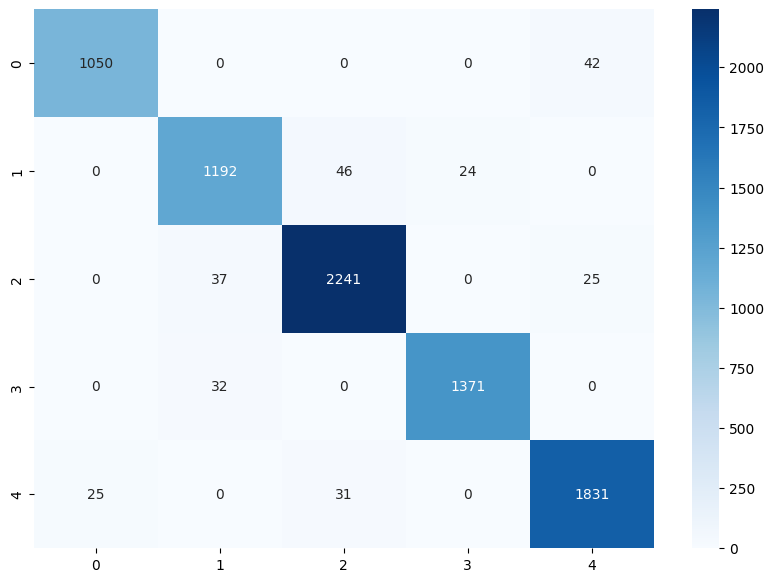

In [79]:
svc = SVC()
buildModel(svc)

Iteration 1, loss = 1.26446743
Iteration 2, loss = 0.41662570
Iteration 3, loss = 0.18185198
Iteration 4, loss = 0.11290937
Iteration 5, loss = 0.08373287
Iteration 6, loss = 0.06575111
Iteration 7, loss = 0.05522928
Iteration 8, loss = 0.05151750
Iteration 9, loss = 0.04518267
Iteration 10, loss = 0.03809945
Iteration 11, loss = 0.03538730
Iteration 12, loss = 0.03334360
Iteration 13, loss = 0.03291483
Iteration 14, loss = 0.02945548
Iteration 15, loss = 0.02631314
Iteration 16, loss = 0.02512430
Iteration 17, loss = 0.02599087
Iteration 18, loss = 0.02278383
Iteration 19, loss = 0.02304254
Iteration 20, loss = 0.02184242
Iteration 21, loss = 0.02005322
Iteration 22, loss = 0.01894320
Iteration 23, loss = 0.01648368
Iteration 24, loss = 0.01656678
Iteration 25, loss = 0.01598287
Iteration 26, loss = 0.01797317
Iteration 27, loss = 0.01404649
Iteration 28, loss = 0.02129535
Iteration 29, loss = 0.01827345
Iteration 30, loss = 0.01343770
Iteration 31, loss = 0.01402216
Iteration 32, los

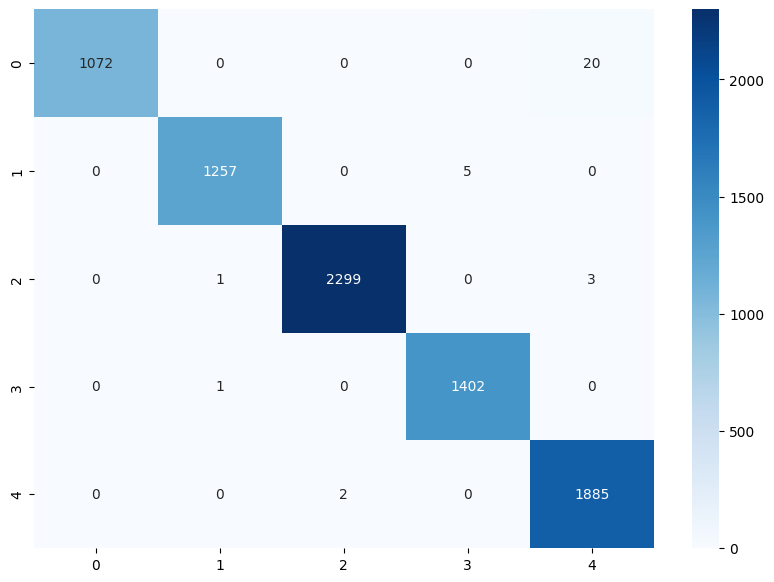

In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(10,20,30,20,10), max_iter=1000, verbose=True)
buildModel(mlp)

Accuracy Score: 0.7796652824965395
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       0.90      0.78      0.84      1092
            Mild       0.67      0.52      0.59      1262
        Moderate       0.74      0.84      0.79      2303
          Normal       0.86      0.86      0.86      1403
          Severe       0.77      0.82      0.79      1887

        accuracy                           0.78      7947
       macro avg       0.79      0.76      0.77      7947
    weighted avg       0.78      0.78      0.78      7947



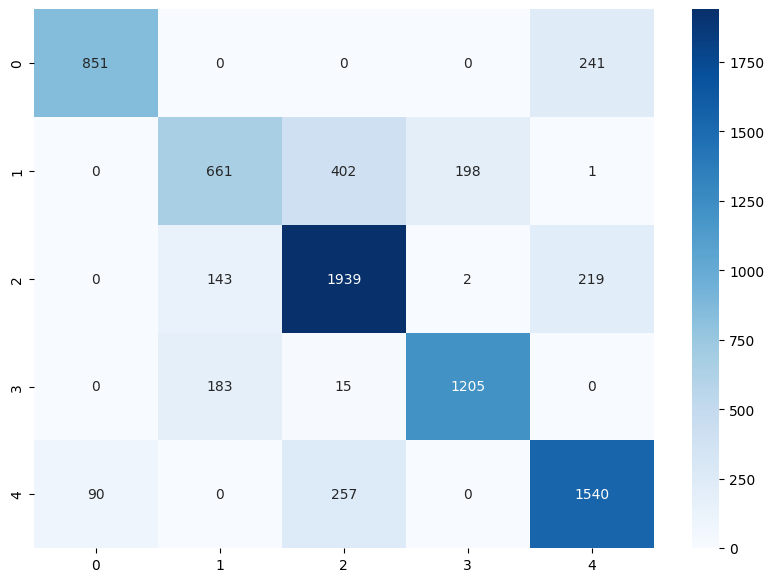

In [81]:
rf = RandomForestClassifier()
buildModel(rf)

C:\Users\Harashpreet Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9964766578583113
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       1.00      0.99      0.99      1092
            Mild       1.00      1.00      1.00      1262
        Moderate       1.00      1.00      1.00      2303
          Normal       1.00      1.00      1.00      1403
          Severe       0.99      1.00      0.99      1887

        accuracy                           1.00      7947
       macro avg       1.00      1.00      1.00      7947
    weighted avg       1.00      1.00      1.00      7947



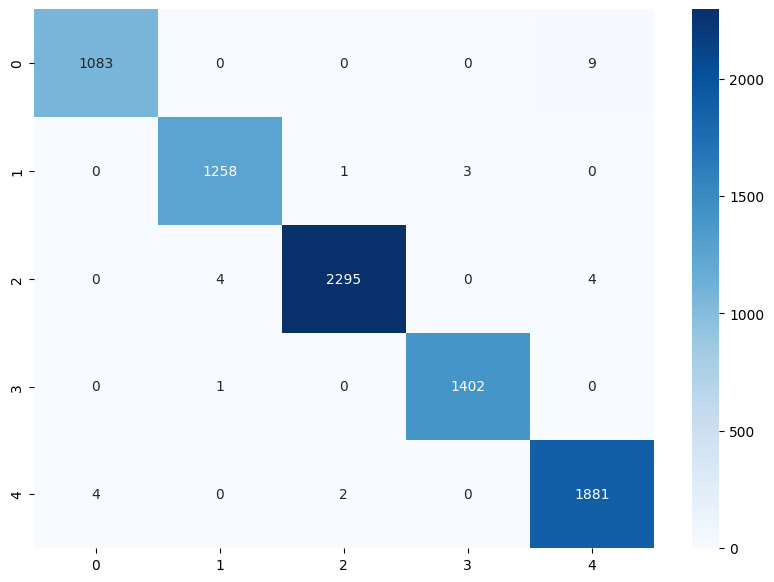

In [82]:
lr = LogisticRegression()
buildModel(lr)

Accuracy Score: 0.604001510003775
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       0.71      0.72      0.72      1092
            Mild       0.42      0.45      0.43      1262
        Moderate       0.59      0.57      0.58      2303
          Normal       0.74      0.72      0.73      1403
          Severe       0.59      0.60      0.59      1887

        accuracy                           0.60      7947
       macro avg       0.61      0.61      0.61      7947
    weighted avg       0.61      0.60      0.60      7947



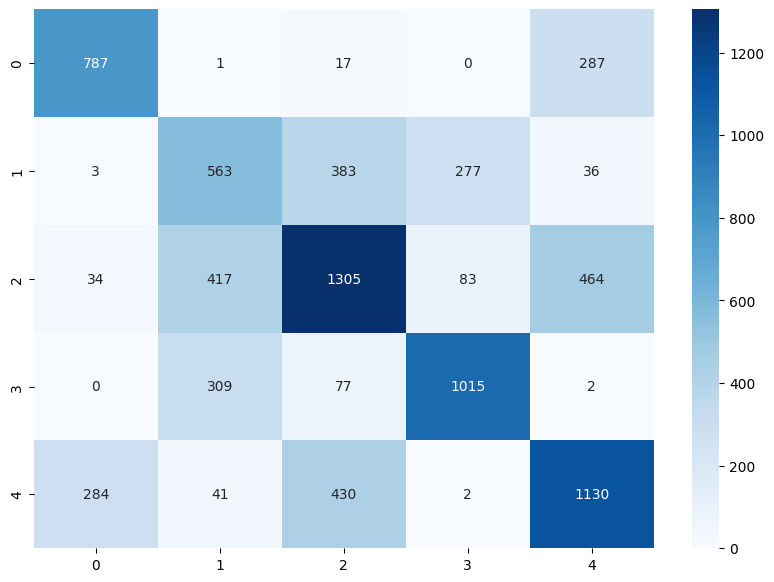

In [83]:
dt = DecisionTreeClassifier()
buildModel(dt)

Accuracy Score: 0.7480810368692589
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       0.82      0.83      0.82      1092
            Mild       0.57      0.65      0.61      1262
        Moderate       0.77      0.70      0.73      2303
          Normal       0.84      0.82      0.83      1403
          Severe       0.75      0.77      0.76      1887

        accuracy                           0.75      7947
       macro avg       0.75      0.75      0.75      7947
    weighted avg       0.75      0.75      0.75      7947



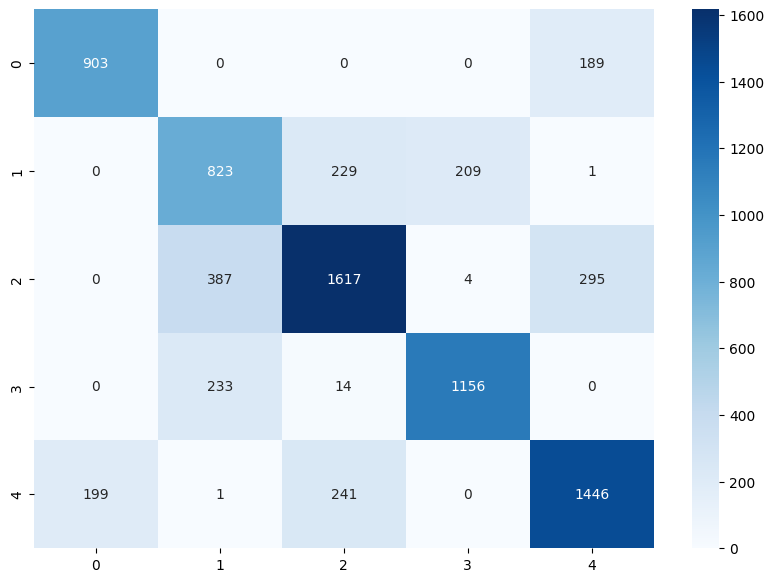

In [84]:
nb = GaussianNB()
buildModel(nb)

Accuracy Score: 0.787844469611174
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       0.90      0.79      0.84      1092
            Mild       0.70      0.57      0.63      1262
        Moderate       0.75      0.84      0.79      2303
          Normal       0.87      0.87      0.87      1403
          Severe       0.77      0.81      0.79      1887

        accuracy                           0.79      7947
       macro avg       0.80      0.78      0.78      7947
    weighted avg       0.79      0.79      0.79      7947



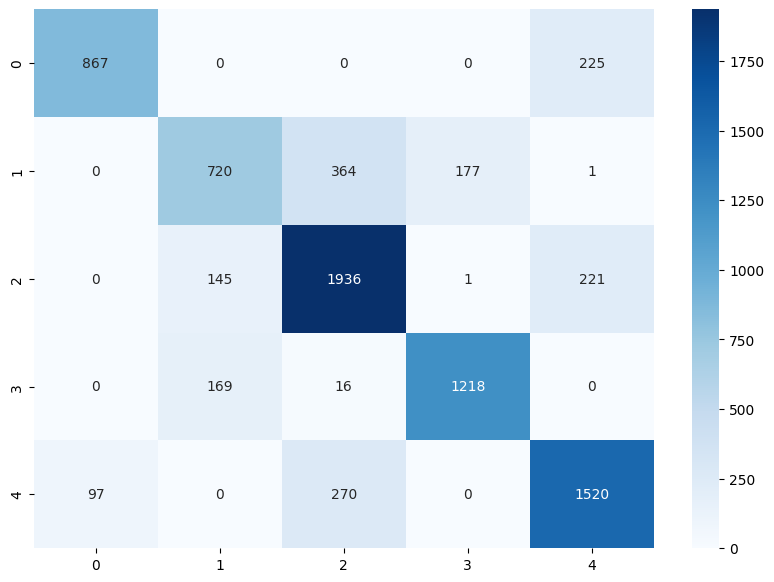

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
buildModel(gb)

Accuracy Score: 0.7385176796275325
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       0.76      0.87      0.81      1092
            Mild       0.59      0.51      0.55      1262
        Moderate       0.77      0.73      0.75      2303
          Normal       0.77      0.89      0.82      1403
          Severe       0.75      0.72      0.73      1887

        accuracy                           0.74      7947
       macro avg       0.73      0.74      0.73      7947
    weighted avg       0.73      0.74      0.73      7947



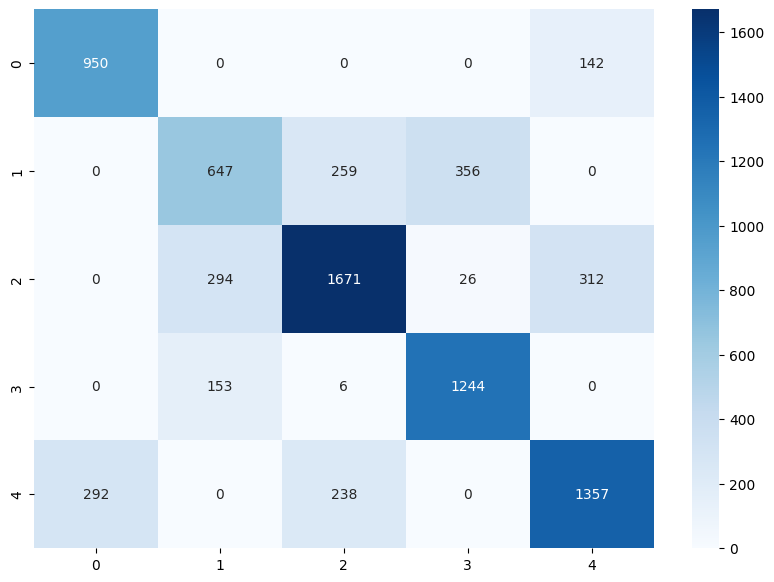

In [86]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
buildModel(ab)

<h1> Hyper Parameter Tuning</h1>

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(10, 20, 30, 20, 10);, score=0.998 total time=   5.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10, 20, 30, 20, 10);, score=0.988 total time=   4.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10, 20, 30, 20, 10);, score=0.972 total time=   3.3s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10, 20, 30, 20, 10);, score=0.989 total time=   3.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10, 20, 30, 20, 10);, score=0.968 total time=   3.8s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10, 20, 10);, score=0.992 total time=   4.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10, 20, 10);, score=0.994 total time=   4.7s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10, 20, 10);, score=0.995 total time=   5.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10, 20, 10);, score=0.997 total time=   6.7s
[CV 5/5

C:\Users\Harashpreet Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10, 20, 10);, score=0.988 total time=  17.1s


C:\Users\Harashpreet Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10, 20, 10);, score=0.991 total time=  16.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10, 20, 10);, score=0.989 total time=  16.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20, 30, 20);, score=0.985 total time=  31.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20, 30, 20);, score=0.985 total time=  30.9s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20, 30, 20);, score=0.985 total time=  31.8s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20, 30, 20);, score=0.987 total time=  32.9s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20, 30, 20);, score=0.981 total time=  30.9s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10, 20, 30, 40, 50);, score=0.995 total time=  37.5s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10, 20, 30, 40, 50);, score=0.991 total time= 1.4min
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10, 20, 30, 40, 50);, score=0.991 total

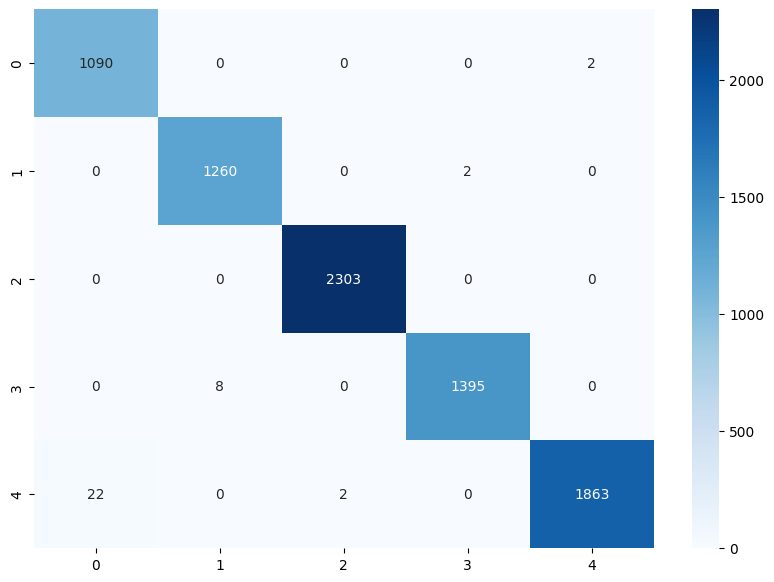

In [88]:
#Hyperparameter for MLP
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,20,30,20,10), (10,20,10), (20,30,20), (10,20,30,40,50), (10,20,30,40,50,60), (10,20,30,40,50,60,70)],
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}

grid = GridSearchCV(MLPClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

buildModel(grid.best_estimator_)